In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,7)

import scipy
from scipy import stats
import statsmodels.formula.api as smf
pd.set_option('display.max_column',None)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency

import sklearn
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('bodyPerformance.csv')
data.sample(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
448,21.0,M,169.5,61.60,12.4,78.0,136.0,27.2,19.3,64.0,200.0,C
109,28.0,F,163.6,52.40,20.3,72.0,118.0,31.0,23.5,23.0,130.0,C
12021,47.0,M,161.8,58.92,17.7,77.0,138.0,34.8,6.7,53.0,194.0,C
1748,39.0,F,163.3,61.80,23.5,79.0,134.0,30.7,22.8,35.0,175.0,A
10842,51.0,F,154.0,49.50,26.6,57.0,115.0,21.0,14.5,32.0,133.0,C
906,60.0,M,173.5,75.20,19.9,80.0,120.0,47.0,12.5,26.0,196.0,C
12109,28.0,M,164.5,66.80,17.6,61.0,107.0,47.1,25.3,47.0,227.0,B
4069,29.0,M,171.4,75.88,27.3,88.0,146.0,39.7,23.8,45.0,201.0,D
11964,23.0,M,179.3,82.30,22.1,89.0,139.0,48.5,18.7,53.0,257.0,B
10202,29.0,M,169.5,76.20,20.1,95.0,159.0,46.3,21.3,61.0,225.0,B


In [4]:
data.shape

(13393, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [9]:
data.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [10]:
data['class'].value_counts()           # the data is equaly classified

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [11]:
data = data.rename(columns = {'body fat_%': 'body_fat_pr', 'sit and bend forward_cm': 'sit_and_bend_forward_cm', 
                              'sit-ups counts' : 'sit_ups_counts', 'broad jump_cm' : 'broad_jump_cm', 'class': 'class_t'})

In [12]:
data.describe()

,age,height_cm,weight_kg,body_fat_pr,diastolic,systolic,gripForce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [13]:
data.describe(include='O')

,gender,class_t
count,13393,13393
unique,2,4
top,M,C
freq,8467,3349


In [14]:
data = data.replace({'M':0, 'F':1})
data = data.replace({'A':1,'B':2,'C':3,'D':4})

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  int64  
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body_fat_pr              13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit_and_bend_forward_cm  13393 non-null  float64
 9   sit_ups_counts           13393 non-null  float64
 10  broad_jump_cm            13393 non-null  float64
 11  class_t                  13393 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.2 MB


In [16]:
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body_fat_pr                0
diastolic                  0
systolic                   0
gripForce                  0
sit_and_bend_forward_cm    0
sit_ups_counts             0
broad_jump_cm              0
class_t                    0
dtype: int64

<AxesSubplot:>

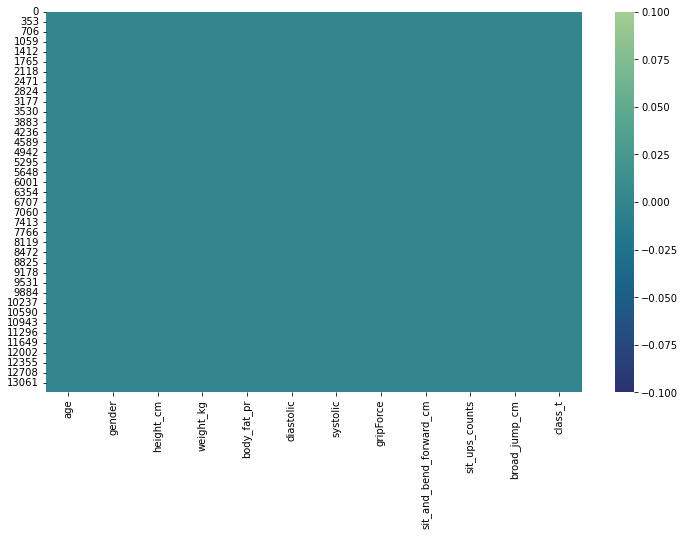

In [17]:
sns.heatmap(data.isnull(), cmap = 'crest_r')

# 

# 

# Response / Target Variable

# 11) class

In [18]:
data.class_t.value_counts()

3    3349
4    3349
1    3348
2    3347
Name: class_t, dtype: int64

Text(0.5, 1.0, 'class_t - Count')

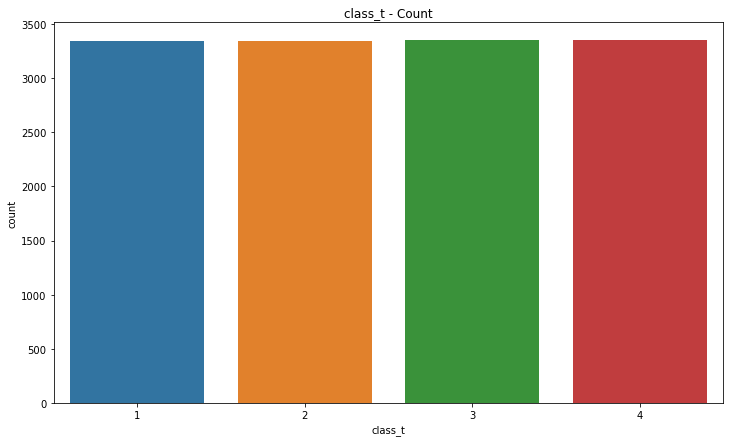

In [19]:
sns.countplot(data.class_t)
plt.title('class_t - Count')

# 

# 

# 0) age

In [20]:
data.age.describe()

count    13393.000000
mean        36.775106
std         13.625639
min         21.000000
25%         25.000000
50%         32.000000
75%         48.000000
max         64.000000
Name: age, dtype: float64

In [21]:
data.age.value_counts()

21.0    964
22.0    789
23.0    668
25.0    644
26.0    629
24.0    617
27.0    546
28.0    527
29.0    407
30.0    374
60.0    368
31.0    338
37.0    282
32.0    275
62.0    265
61.0    254
39.0    243
36.0    239
38.0    230
63.0    230
34.0    229
33.0    229
35.0    223
41.0    217
64.0    215
40.0    211
56.0    197
48.0    196
59.0    192
43.0    192
51.0    191
50.0    189
55.0    185
45.0    183
46.0    181
57.0    181
58.0    180
42.0    179
47.0    172
44.0    172
49.0    163
54.0    152
52.0    140
53.0    135
Name: age, dtype: int64

Text(0.5, 1.0, 'Histogram Of age')

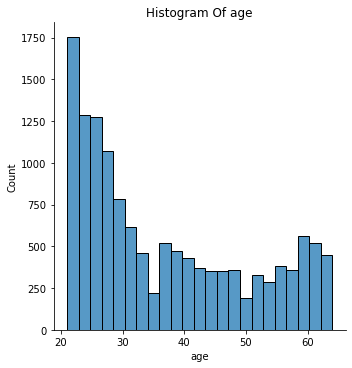

In [22]:
sns.displot(data.age)
plt.title('Histogram Of age')

Text(0.5, 1.0, 'Normality Of age')

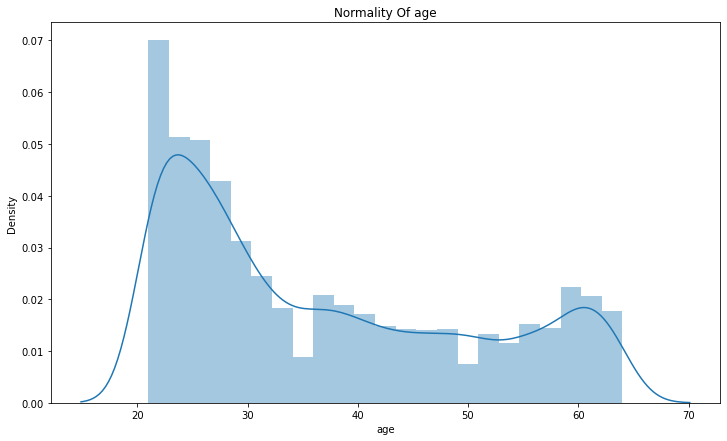

In [23]:
sns.distplot(data.age)
plt.title('Normality Of age')

Text(0.5, 1.0, 'age - Count')

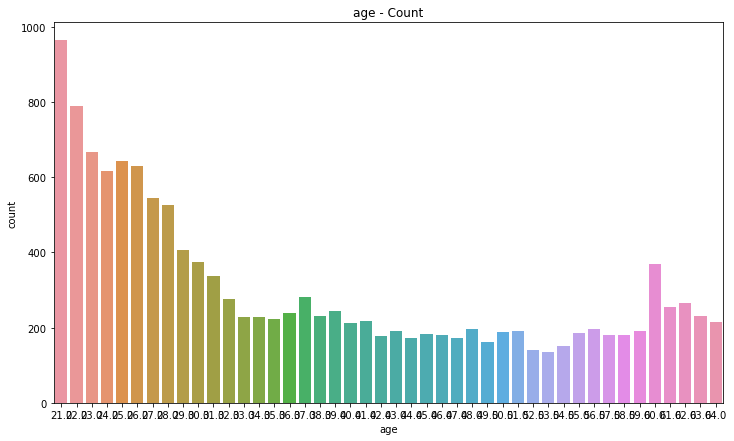

In [18]:
sns.countplot(data.age)
plt.title('age - Count')

Text(0.5, 1.0, 'Box Plot of age')

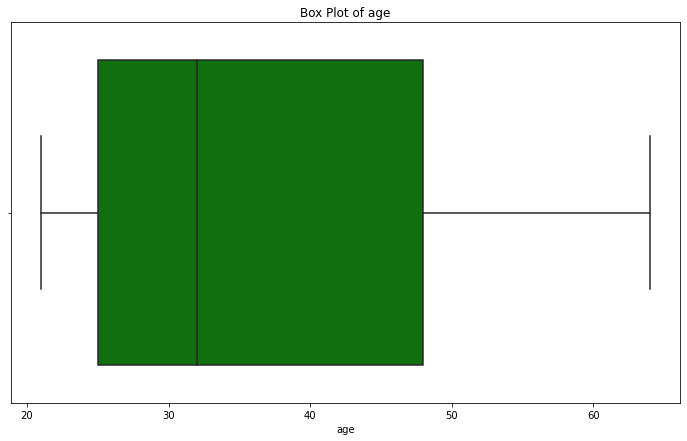

In [24]:
sns.boxplot(data.age, color = 'g')
plt.title('Box Plot of age')

In [25]:
data.age.groupby(data.class_t).describe()

,count,mean,std,min,25%,50%,75%,max
class_t,,,,,,,,
1,3348.0,35.268220,12.999128,21.0,25.0,30.0,44.0,64.0
2,3347.0,37.074096,13.704285,21.0,25.0,32.0,49.0,64.0
3,3349.0,36.699612,13.780536,21.0,24.0,32.0,48.0,64.0
4,3349.0,38.058226,13.859808,21.0,25.0,36.0,50.0,64.0


In [26]:
mod_a = ols('class_t ~ age', data = data).fit()
sm.stats.anova_lm(mod_a)

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,72.074045,72.074045,57.896423,2.947088e-14
Residual,13391.0,16670.175489,1.244879,NaN,NaN


In [27]:
tukey_a = pairwise_tukeyhsd(data.age, data.class_t, alpha = 0.05)
print(tukey_a)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   1.8059  0.001  0.9524 2.6594   True
     1      3   1.4314  0.001   0.578 2.2848   True
     1      4     2.79  0.001  1.9366 3.6434   True
     2      3  -0.3745 0.6523 -1.2279  0.479  False
     2      4   0.9841 0.0162  0.1307 1.8376   True
     3      4   1.3586  0.001  0.5053 2.2119   True
---------------------------------------------------


In [ ]:
sns.catplot(x = 'class_t', y ='age', kind = 'swarm', data = data)
plt.title('Cat Plot Of age vs class_t')

In [ ]:
sns.boxplot(x = 'class_t', y ='age', data = data)
plt.title('Box Plot Of age vs class_t')

**GOOD PREDICTOR**

# 

# 

# 1) gender

In [25]:
data.gender.value_counts()

0    8467
1    4926
Name: gender, dtype: int64

Text(0.5, 1.0, 'gender - Count')

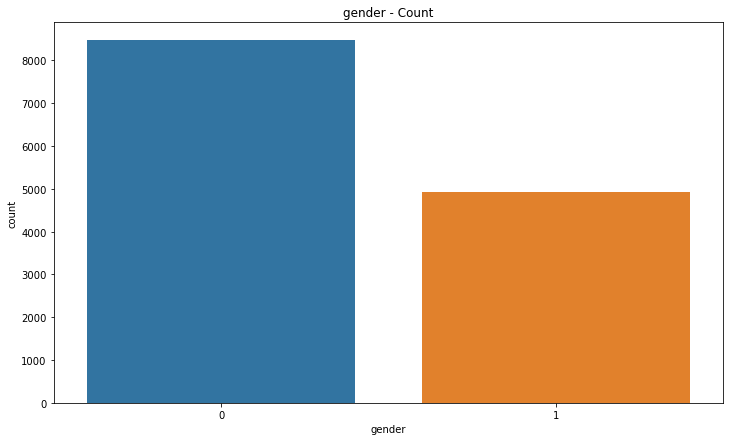

In [26]:
sns.countplot(data.gender)
plt.title('gender - Count')

In [27]:
ct_g = pd.crosstab(data.gender, data.class_t)
ct_g

class_t,1,2,3,4
gender,,,,
0,1864,2162,2237,2204
1,1484,1185,1112,1145


In [28]:
chi2_contingency(ct_g, correction = False)

(112.77302615919672,
 2.776465508889498e-24,
 3,
 array([[2116.59195102, 2115.9597551 , 2117.22414694, 2117.22414694],
        [1231.40804898, 1231.0402449 , 1231.77585306, 1231.77585306]]))

Text(0.5, 1.0, 'gender vs class_t')

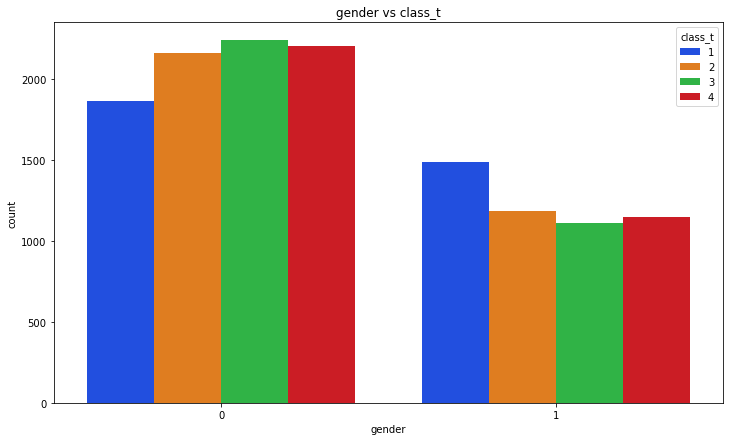

In [29]:
sns.countplot(data.gender, hue = data.class_t, palette = 'bright')
plt.title('gender vs class_t')

**GOOD PREDICTOR**

# 

# 

# 2) height_cm

In [30]:
data.height_cm.describe()

count    13393.000000
mean       168.559807
std          8.426583
min        125.000000
25%        162.400000
50%        169.200000
75%        174.800000
max        193.800000
Name: height_cm, dtype: float64

In [31]:
data.height_cm.value_counts()

170.0    126
173.0    112
175.0    103
171.0    101
172.0     94
        ... 
189.1      1
190.5      1
143.6      1
139.9      1
146.1      1
Name: height_cm, Length: 467, dtype: int64

Text(0.5, 1.0, 'Histogram Of height_cm')

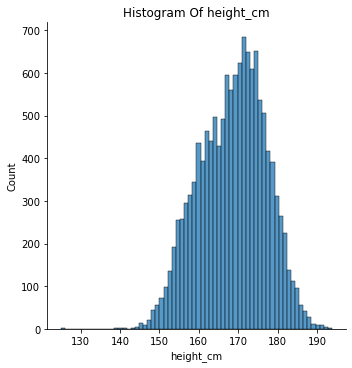

In [32]:
sns.displot(data.height_cm)
plt.title('Histogram Of height_cm')

Text(0.5, 1.0, 'Normality Of height_cm')

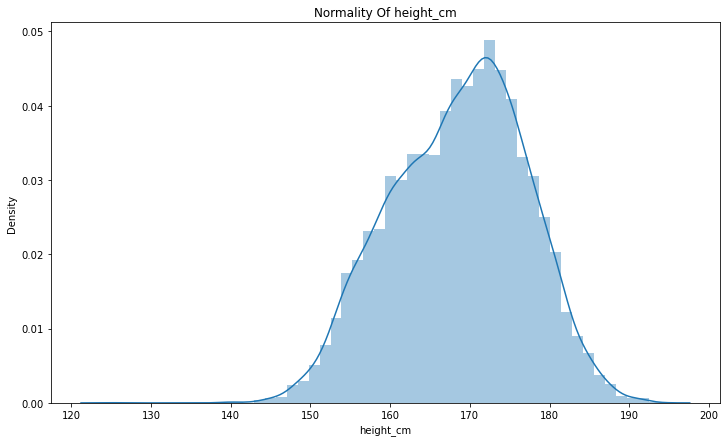

In [33]:
sns.distplot(data.height_cm)
plt.title('Normality Of height_cm')

Text(0.5, 1.0, 'height_cm - Count')

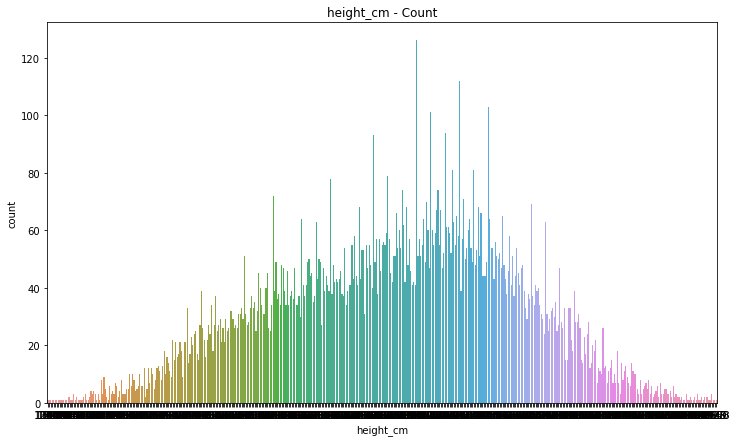

In [34]:
sns.countplot(data.height_cm)
plt.title('height_cm - Count')

Text(0.5, 1.0, 'Box Plot of height_cm')

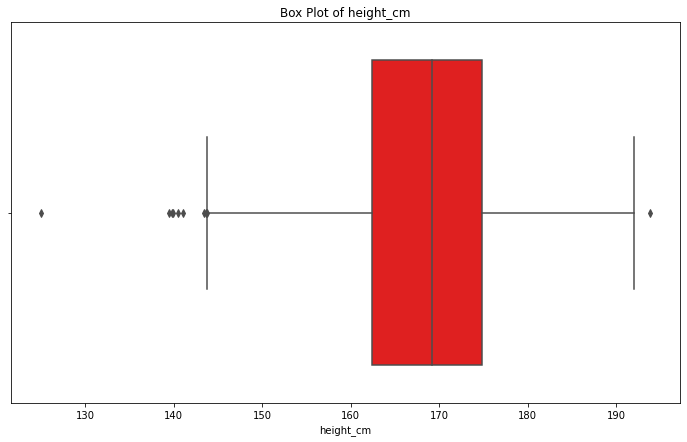

In [35]:
sns.boxplot(data.height_cm, color = 'r')
plt.title('Box Plot of height_cm')

In [36]:
Q3_h = data.height_cm.quantile(0.75)
Q3_h

174.8

In [37]:
Q1_h = data.height_cm.quantile(0.25)
Q1_h

162.4

In [38]:
IQR_h = Q3_h - Q1_h
IQR_h

12.400000000000006

In [39]:
UL_h = Q3_h + (1.5 * IQR_h)
UL_h

193.40000000000003

In [40]:
LL_h = Q1_h - (1.5 * IQR_h)
LL_h

143.8

In [41]:
data.height_cm[(data.height_cm > UL_h)].value_counts().sum()

1

In [42]:
data.height_cm[(data.height_cm < LL_h)].value_counts().sum()

9

In [43]:
data['height_cm'] = np.where(data['height_cm'] > UL_h, UL_h, data['height_cm'])

In [44]:
data['height_cm'] = np.where(data['height_cm'] < LL_h, LL_h, data['height_cm'])

Text(0.5, 1.0, 'Box Plot of height_cm')

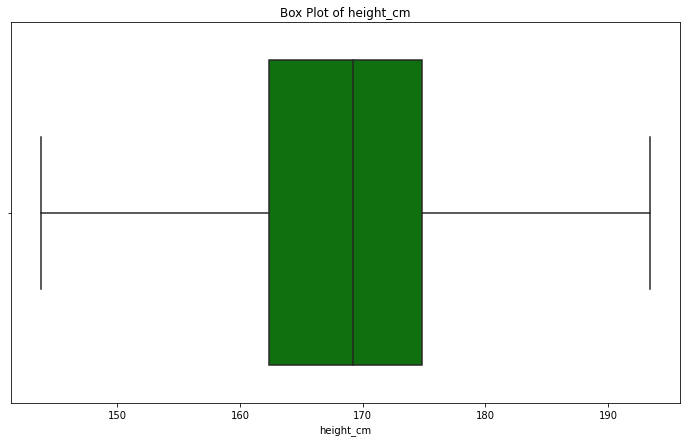

In [45]:
sns.boxplot(data.height_cm, color = 'g')
plt.title('Box Plot of height_cm')

Text(0.5, 1.0, 'Normality Of height_cm')

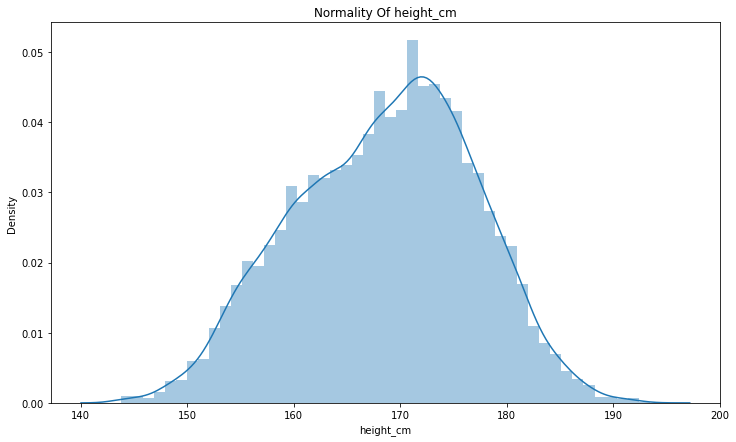

In [46]:
sns.distplot(data.height_cm)
plt.title('Normality Of height_cm')

In [47]:
data.height_cm.groupby(data.class_t).describe()

,count,mean,std,min,25%,50%,75%,max
class_t,,,,,,,,
1,3348.0,167.872013,7.834627,143.8,162.0,168.0,173.8,191.8
2,3347.0,168.586077,8.106981,143.8,162.9,169.2,174.4,191.8
3,3349.0,169.162884,8.519603,143.8,163.2,170.0,175.2,193.4
4,3349.0,168.629233,9.103026,143.8,161.9,169.7,175.5,192.0


In [48]:
mod_h = ols('class_t ~ height_cm', data = data).fit()
sm.stats.anova_lm(mod_h)

,df,sum_sq,mean_sq,F,PR(>F)
height_cm,1.0,23.972739,23.972739,19.201677,0.000012
Residual,13391.0,16718.276794,1.248471,NaN,NaN


In [49]:
tukey_h = pairwise_tukeyhsd(data.height_cm, data.class_t, alpha = 0.05)
print(tukey_h)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.7141 0.0029  0.1862  1.2419   True
     1      3   1.2909  0.001  0.7631  1.8186   True
     1      4   0.7572 0.0013  0.2295   1.285   True
     2      3   0.5768 0.0257   0.049  1.1046   True
     2      4   0.0432    0.9 -0.4846   0.571  False
     3      4  -0.5337 0.0463 -1.0614 -0.0059   True
----------------------------------------------------


Text(0.5, 1.0, 'Cat Plot Of height_cm vs class_t')

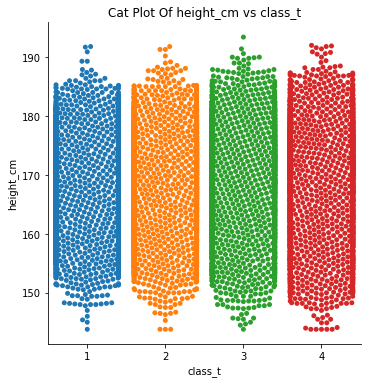

In [50]:
sns.catplot(x = 'class_t', y ='height_cm', kind = 'swarm', data = data)
plt.title('Cat Plot Of height_cm vs class_t')

Text(0.5, 1.0, 'Box Plot Of height_cm vs class_t')

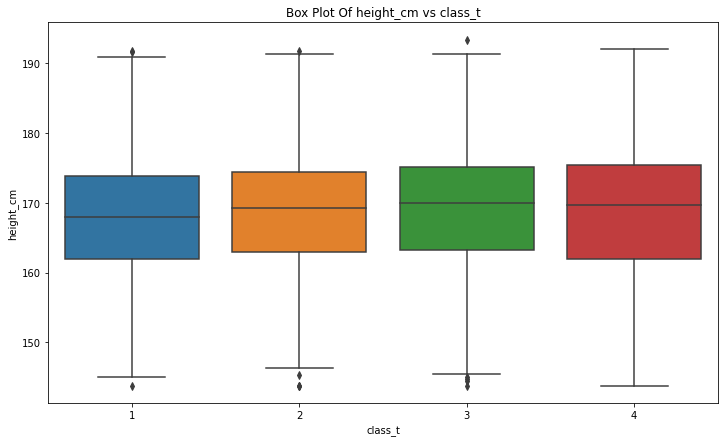

In [51]:
sns.boxplot(x = 'class_t', y ='height_cm', data = data)
plt.title('Box Plot Of height_cm vs class_t')

**GOOD PREDICTOR**

# 

# 

# 3) weight_kg

In [52]:
data.weight_kg.describe()

count    13393.000000
mean        67.447316
std         11.949666
min         26.300000
25%         58.200000
50%         67.400000
75%         75.300000
max        138.100000
Name: weight_kg, dtype: float64

In [53]:
data.weight_kg.value_counts()

70.50    53
70.00    51
71.00    51
73.20    49
66.00    49
         ..
69.36     1
72.66     1
92.88     1
54.12     1
40.00     1
Name: weight_kg, Length: 1398, dtype: int64

Text(0.5, 1.0, 'Histogram Of weight_kg')

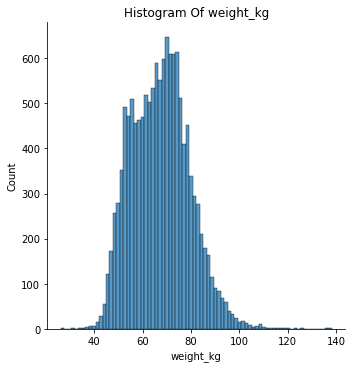

In [54]:
sns.displot(data.weight_kg)
plt.title('Histogram Of weight_kg')

Text(0.5, 1.0, 'Normality Of weight_kg')

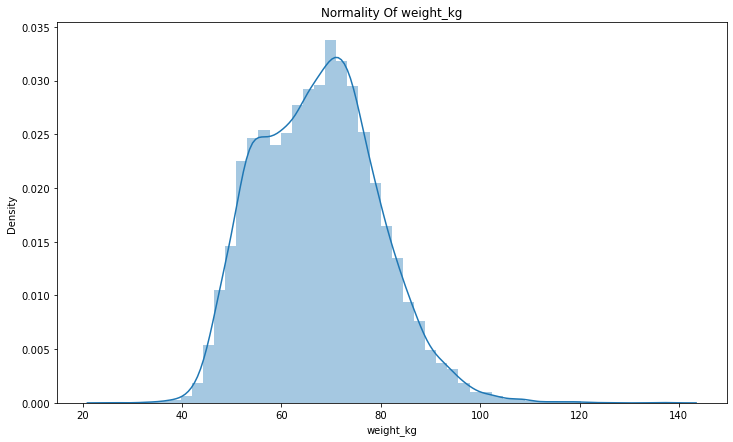

In [55]:
sns.distplot(data.weight_kg)
plt.title('Normality Of weight_kg')

Text(0.5, 1.0, 'weight_kg - Count')

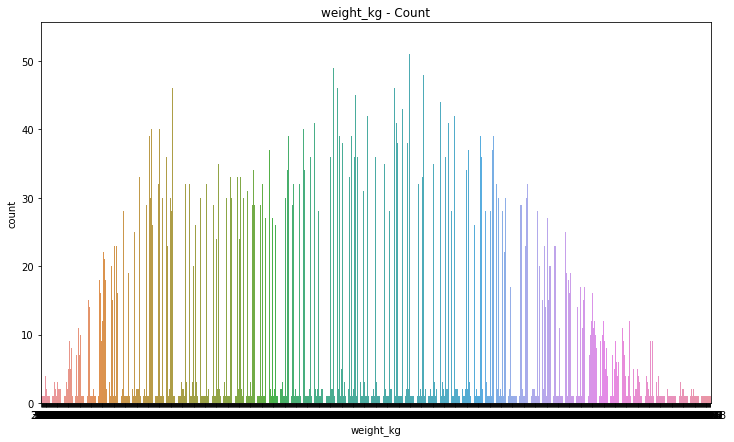

In [56]:
sns.countplot(data.weight_kg)
plt.title('weight_kg - Count')

Text(0.5, 1.0, 'Box Plot of weight_kg')

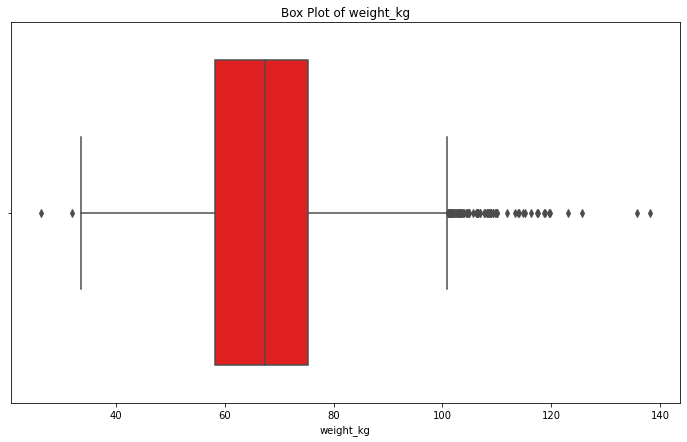

In [57]:
sns.boxplot(data.weight_kg, color = 'r')
plt.title('Box Plot of weight_kg')

In [58]:
Q3_w = data.weight_kg.quantile(0.75)
Q3_w

75.3

In [59]:
Q1_w = data.weight_kg.quantile(0.25)
Q1_w

58.2

In [60]:
IQR_w = Q3_w - Q1_w
IQR_w

17.099999999999994

In [61]:
UL_w = Q3_w + (1.5 * IQR_w)
UL_w

100.94999999999999

In [62]:
LL_w = Q1_w - (1.5 * IQR_w)
LL_w

32.55000000000001

In [63]:
data.weight_kg[(data.weight_kg > UL_w)].value_counts().sum()

81

In [64]:
data.weight_kg[(data.weight_kg < LL_w)].value_counts().sum()

2

In [65]:
data['weight_kg'] = np.where(data['weight_kg'] > UL_w, UL_w, data['weight_kg'])

In [66]:
data['weight_kg'] = np.where(data['weight_kg'] < LL_w, LL_w, data['weight_kg'])

Text(0.5, 1.0, 'Box Plot of weight_kg')

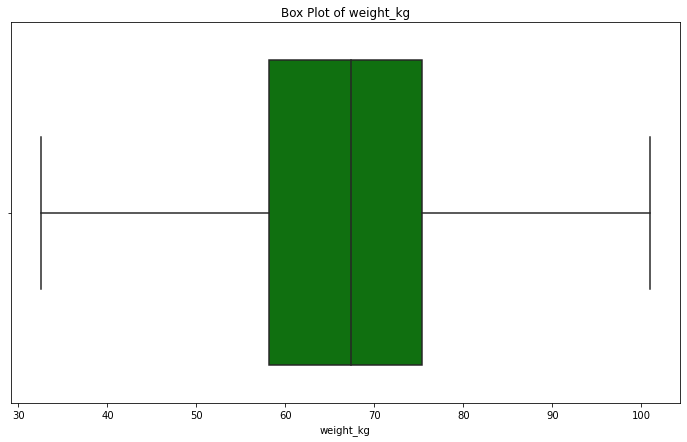

In [67]:
sns.boxplot(data.weight_kg, color = 'g')
plt.title('Box Plot of weight_kg')

Text(0.5, 1.0, 'Normality Of gweight_kg')

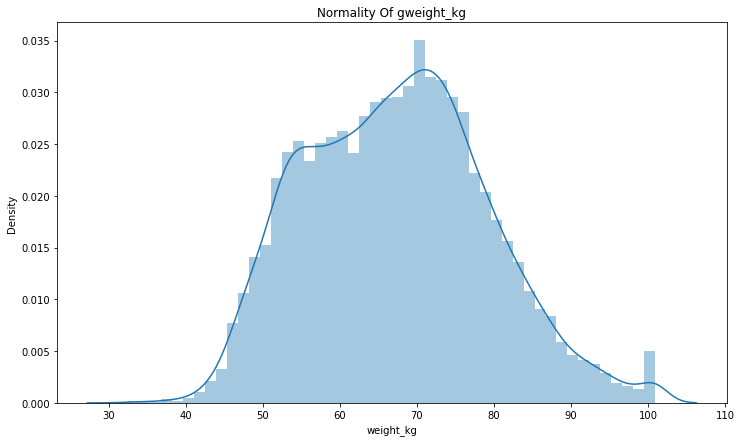

In [68]:
sns.distplot(data.weight_kg)
plt.title('Normality Of gweight_kg')

In [69]:
data.weight_kg.groupby(data.class_t).describe()

,count,mean,std,min,25%,50%,75%,max
class_t,,,,,,,,
1,3348.0,64.418044,10.551070,34.50,55.7,64.46,72.285,100.95
2,3347.0,66.606430,10.854954,32.55,58.2,67.10,74.250,100.95
3,3349.0,66.759388,10.860954,38.10,58.4,67.20,74.500,100.95
4,3349.0,71.838116,13.440336,32.55,61.7,71.80,81.400,100.95


In [70]:
mod_k = ols('class_t ~ weight_kg', data = data).fit()
sm.stats.anova_lm(mod_k)

,df,sum_sq,mean_sq,F,PR(>F)
weight_kg,1.0,754.725056,754.725056,632.150602,2.413570e-136
Residual,13391.0,15987.524477,1.193901,NaN,NaN


In [71]:
tukey_k = pairwise_tukeyhsd(data.weight_kg, data.class_t, alpha = 0.05)
print(tukey_k)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   2.1884 0.001   1.467 2.9098   True
     1      3   2.3413 0.001  1.6201 3.0626   True
     1      4   7.4201 0.001  6.6988 8.1414   True
     2      3    0.153   0.9 -0.5684 0.8743  False
     2      4   5.2317 0.001  4.5104  5.953   True
     3      4   5.0787 0.001  4.3575    5.8   True
--------------------------------------------------


Text(0.5, 1.0, 'Cat Plot Of weight_kg vs class_t')

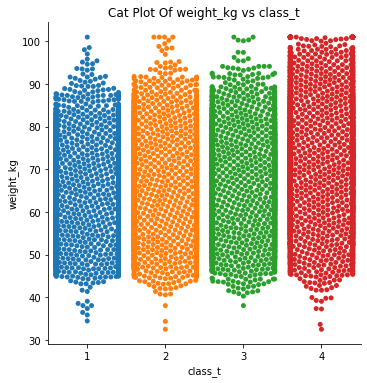

In [72]:
sns.catplot(x = 'class_t', y ='weight_kg', kind = 'swarm', data = data)
plt.title('Cat Plot Of weight_kg vs class_t')

Text(0.5, 1.0, 'Box Plot Of weight_kg vs class_t')

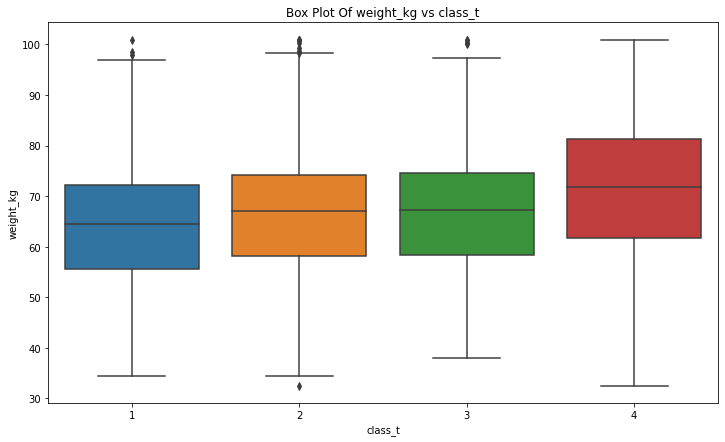

In [73]:
sns.boxplot(x = 'class_t', y ='weight_kg', data = data)
plt.title('Box Plot Of weight_kg vs class_t')

**GOOD PREDICTOR**

# 

# 

# 4) body_fat_pr

In [74]:
data = data.rename(columns = {'body_fat_%' : 'body_fat_pr'})

In [75]:
data.body_fat_pr.describe()

count    13393.000000
mean        23.240165
std          7.256844
min          3.000000
25%         18.000000
50%         22.800000
75%         28.000000
max         78.400000
Name: body_fat_pr, dtype: float64

In [76]:
data.body_fat_pr.value_counts()

23.10000    90
24.50000    87
20.20000    87
22.80000    87
20.30000    85
            ..
46.90000     1
30.25304     1
30.21000     1
35.28637     1
15.16476     1
Name: body_fat_pr, Length: 527, dtype: int64

Text(0.5, 1.0, 'Histogram Of body_fat_pr')

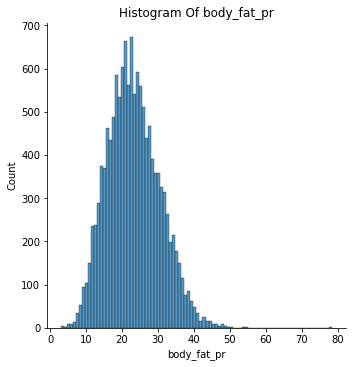

In [77]:
sns.displot(data.body_fat_pr)
plt.title('Histogram Of body_fat_pr')

Text(0.5, 1.0, 'Normality Of body_fat_pr')

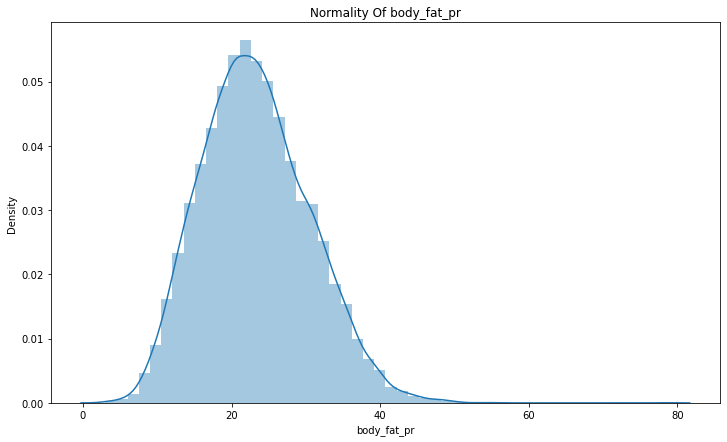

In [78]:
sns.distplot(data.body_fat_pr)
plt.title('Normality Of body_fat_pr')

Text(0.5, 1.0, 'body_fat_pr - Count')

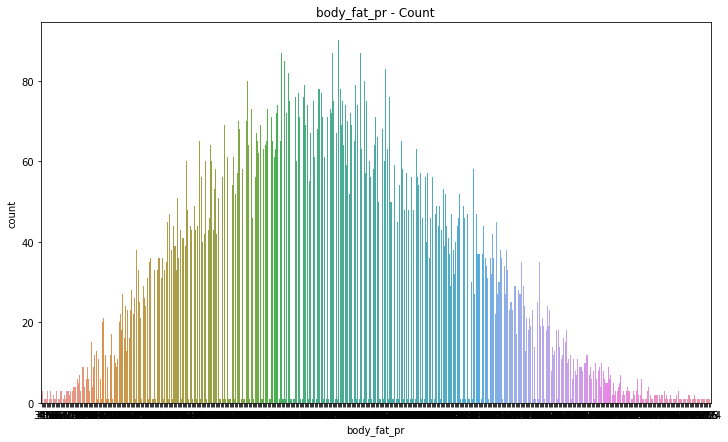

In [79]:
sns.countplot(data.body_fat_pr)
plt.title('body_fat_pr - Count')

Text(0.5, 1.0, 'Box Plot of body_fat_pr')

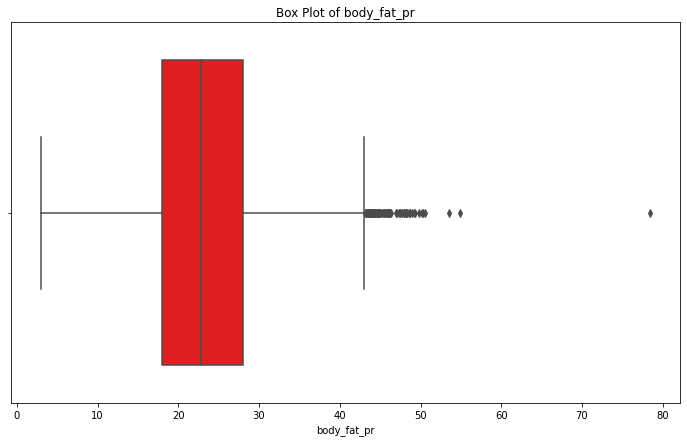

In [80]:
sns.boxplot(data.body_fat_pr, color = 'r')
plt.title('Box Plot of body_fat_pr')

In [81]:
Q3_bfp = data.body_fat_pr.quantile(0.75)
Q3_bfp

28.0

In [82]:
Q1_bfp = data.body_fat_pr.quantile(0.25)
Q1_bfp

18.0

In [83]:
IQR_bfp = Q3_bfp - Q1_bfp
IQR_bfp

10.0

In [84]:
UL_bfp = Q3_bfp + (1.5 * IQR_bfp)
UL_bfp

43.0

In [85]:
LL_bfp = Q1_bfp - (1.5 * IQR_bfp)
LL_bfp

3.0

In [86]:
data.body_fat_pr[(data.body_fat_pr > UL_bfp)].value_counts().sum()

77

In [87]:
data.body_fat_pr[(data.body_fat_pr < LL_bfp)].value_counts().sum()

0

In [88]:
data['body_fat_pr'] = np.where(data['body_fat_pr'] > UL_bfp, UL_bfp, data['body_fat_pr'])

Text(0.5, 1.0, 'Box Plot of body_fat_pr')

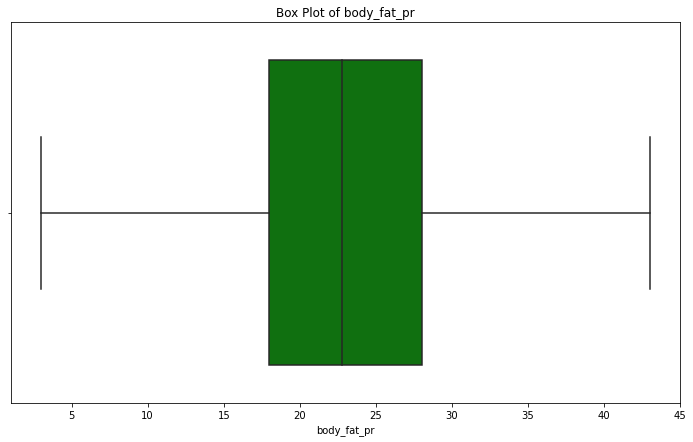

In [89]:
sns.boxplot(data.body_fat_pr, color = 'g')
plt.title('Box Plot of body_fat_pr')

Text(0.5, 1.0, 'Normality Of body_fat_pr')

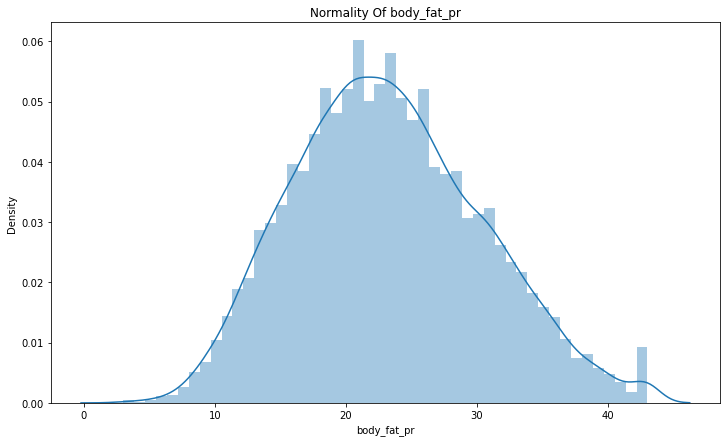

In [90]:
sns.distplot(data.body_fat_pr)
plt.title('Normality Of body_fat_pr')

In [91]:
data.body_fat_pr.groupby(data.class_t).describe()

,count,mean,std,min,25%,50%,75%,max
class_t,,,,,,,,
1,3348.0,20.528586,6.369179,3.0,15.7,20.2,25.1,43.0
2,3347.0,22.039533,6.646649,4.7,17.1,21.7,26.6,43.0
3,3349.0,22.644564,6.273248,3.5,18.4,22.2,26.4,43.0
4,3349.0,27.667352,7.348068,3.5,22.8,27.4,32.8,43.0


In [92]:
mod_bfp = ols('class_t ~ body_fat_pr', data = data).fit()
sm.stats.anova_lm(mod_bfp)

,df,sum_sq,mean_sq,F,PR(>F)
body_fat_pr,1.0,1963.291862,1963.291862,1778.910388,0.0
Residual,13391.0,14778.957671,1.103649,NaN,NaN


In [93]:
tukey_bfp = pairwise_tukeyhsd(data.body_fat_pr, data.class_t, alpha = 0.05)
print(tukey_bfp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   1.5109  0.001 1.0919   1.93   True
     1      3    2.116  0.001  1.697  2.535   True
     1      4   7.1388  0.001 6.7198 7.5578   True
     2      3    0.605 0.0012  0.186 1.0241   True
     2      4   5.6278  0.001 5.2088 6.0468   True
     3      4   5.0228  0.001 4.6038 5.4417   True
--------------------------------------------------


Text(0.5, 1.0, 'Cat Plot Of body_fat_pr vs class_t')

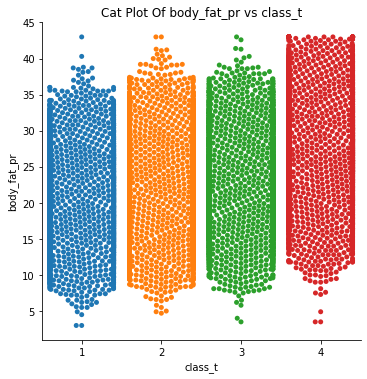

In [94]:
sns.catplot(x = 'class_t', y ='body_fat_pr', kind = 'swarm', data = data)
plt.title('Cat Plot Of body_fat_pr vs class_t')

Text(0.5, 1.0, 'Box Plot Of body_fat_pr vs class_t')

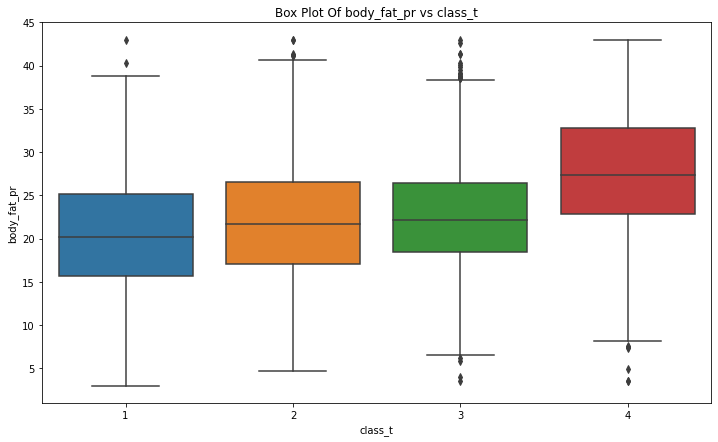

In [95]:
sns.boxplot(x = 'class_t', y ='body_fat_pr', data = data)
plt.title('Box Plot Of body_fat_pr vs class_t')

**GOOD PREDICTOR**

# 

# 

# 5) diastolic

In [96]:
data.diastolic.describe()

count    13393.000000
mean        78.796842
std         10.742033
min          0.000000
25%         71.000000
50%         79.000000
75%         86.000000
max        156.200000
Name: diastolic, dtype: float64

In [97]:
data.diastolic.value_counts()

80.0     670
77.0     482
75.0     475
78.0     474
81.0     464
        ... 
120.0      1
117.0      1
37.0       1
8.0        1
105.0      1
Name: diastolic, Length: 89, dtype: int64

Text(0.5, 1.0, 'Histogram Of diastolic')

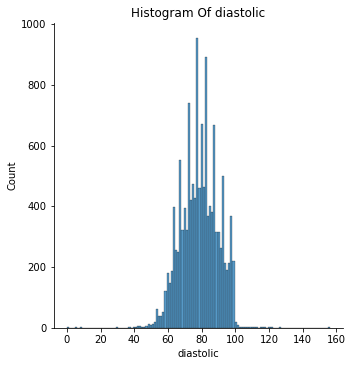

In [98]:
sns.displot(data.diastolic)
plt.title('Histogram Of diastolic')

Text(0.5, 1.0, 'Normality Of diastolic')

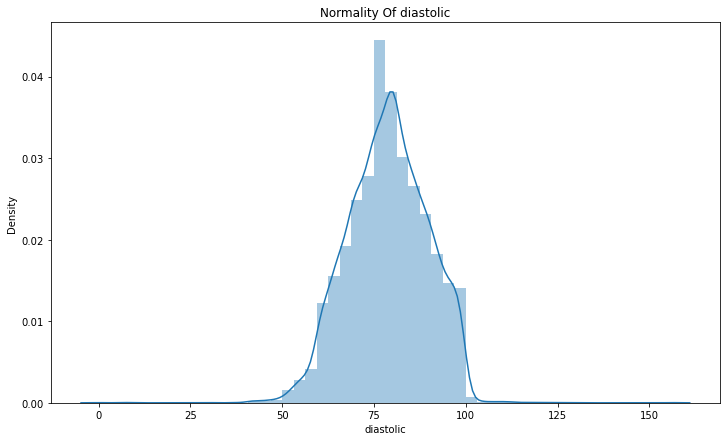

In [99]:
sns.distplot(data.diastolic)
plt.title('Normality Of diastolic')

Text(0.5, 1.0, 'diastolic - Count')

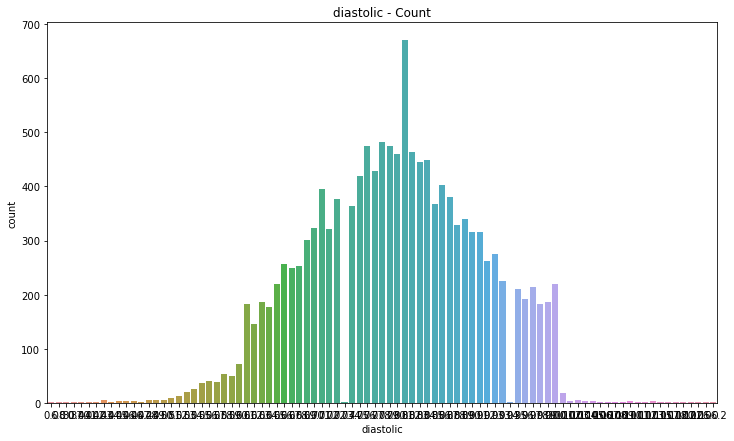

In [100]:
sns.countplot(data.diastolic)
plt.title('diastolic - Count')

Text(0.5, 1.0, 'Box Plot of diastolic')

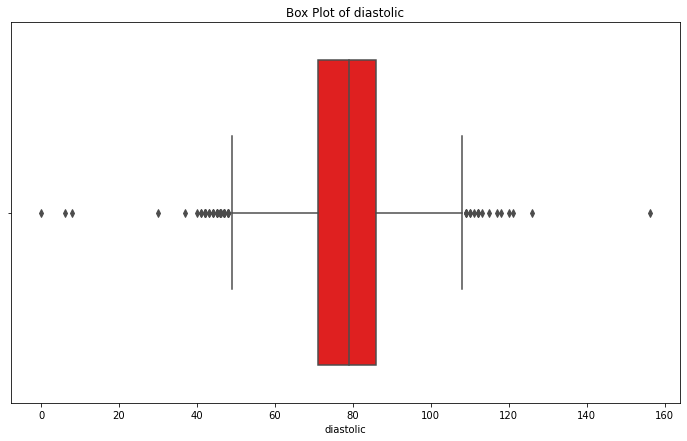

In [101]:
sns.boxplot(data.diastolic, color = 'r')
plt.title('Box Plot of diastolic')

In [102]:
Q3_d = data.diastolic.quantile(0.75)
Q3_d

86.0

In [103]:
Q1_d = data.diastolic.quantile(0.25)
Q1_d

71.0

In [104]:
IQR_d = Q3_d - Q1_d
IQR_d

15.0

In [105]:
UL_d = Q3_d + (1.5 * IQR_d)
UL_d

108.5

In [106]:
LL_d = Q1_d - (1.5 * IQR_d)
LL_d

48.5

In [107]:
data.diastolic[(data.diastolic > UL_d)].value_counts().sum()

17

In [108]:
data.diastolic[(data.diastolic < LL_d)].value_counts().sum()

37

In [109]:
data['diastolic'] = np.where(data['diastolic'] > UL_d, UL_d, data['diastolic'])

In [110]:
data['diastolic'] = np.where(data['diastolic'] < LL_d, LL_d, data['diastolic'])

Text(0.5, 1.0, 'Box Plot of diastolic')

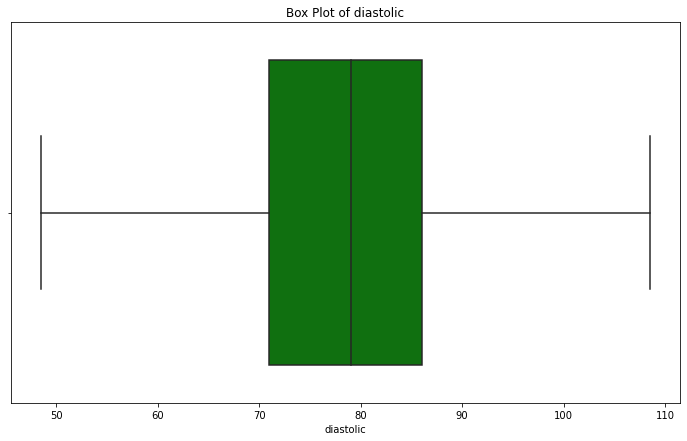

In [111]:
sns.boxplot(data.diastolic, color = 'g')
plt.title('Box Plot of diastolic')

Text(0.5, 1.0, 'Normality Of diastolic')

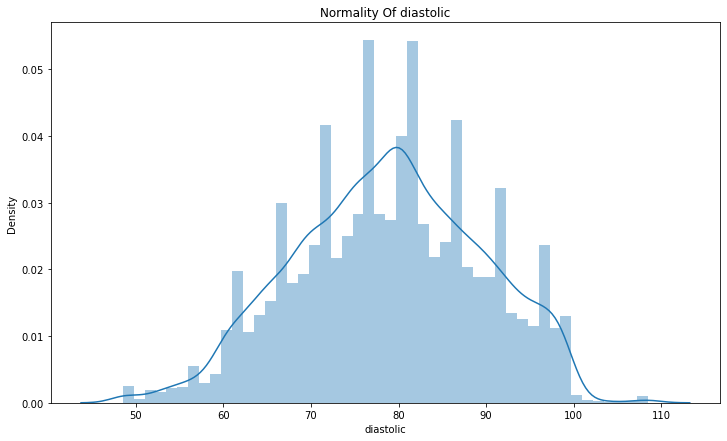

In [112]:
sns.distplot(data.diastolic)
plt.title('Normality Of diastolic')

In [113]:
data.diastolic.groupby(data.class_t).describe()

,count,mean,std,min,25%,50%,75%,max
class_t,,,,,,,,
1,3348.0,77.905137,10.532608,48.5,71.0,78.0,86.0,108.5
2,3347.0,78.688378,10.507625,48.5,71.0,79.0,86.0,108.5
3,3349.0,78.544192,10.501862,48.5,71.0,79.0,86.0,108.5
4,3349.0,80.093102,10.814584,48.5,73.0,80.0,88.0,108.5


In [114]:
mod_d = ols('class_t ~ diastolic', data = data).fit()
sm.stats.anova_lm(mod_d)

,df,sum_sq,mean_sq,F,PR(>F)
diastolic,1.0,76.503142,76.503142,61.470608,4.832432e-15
Residual,13391.0,16665.746392,1.244548,NaN,NaN


In [115]:
tukey_d = pairwise_tukeyhsd(data.diastolic, data.class_t, alpha = 0.05)
print(tukey_d)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.7832 0.0133  0.1182 1.4483   True
     1      3   0.6391 0.0649 -0.0259  1.304  False
     1      4    2.188  0.001   1.523 2.8529   True
     2      3  -0.1442    0.9 -0.8092 0.5208  False
     2      4   1.4047  0.001  0.7397 2.0698   True
     3      4   1.5489  0.001   0.884 2.2138   True
---------------------------------------------------


Text(0.5, 1.0, 'Cat Plot Of diastolic vs class_t')

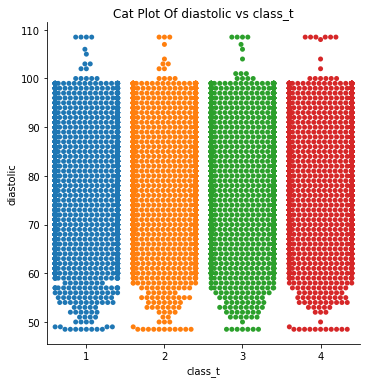

In [116]:
sns.catplot(x = 'class_t', y ='diastolic', kind = 'swarm', data = data)
plt.title('Cat Plot Of diastolic vs class_t')

Text(0.5, 1.0, 'Box Plot Of diastolic vs class_t')

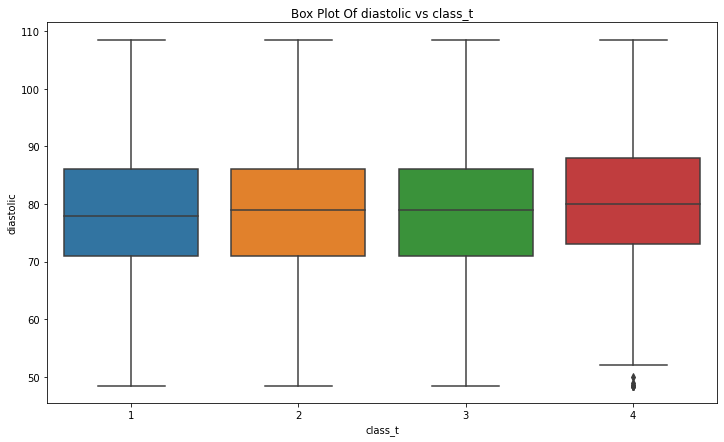

In [117]:
sns.boxplot(x = 'class_t', y ='diastolic', data = data)
plt.title('Box Plot Of diastolic vs class_t')

**GOOD PREDICTOR**

# 

# 

# 6) systolic

In [118]:
data.systolic.describe()

count    13393.000000
mean       130.234817
std         14.713954
min          0.000000
25%        120.000000
50%        130.000000
75%        141.000000
max        201.000000
Name: systolic, dtype: float64

In [119]:
data.systolic.value_counts()

120.0    515
130.0    416
123.0    404
134.0    335
128.0    320
        ... 
184.0      1
187.0      1
195.0      1
77.0       1
168.0      1
Name: systolic, Length: 102, dtype: int64

Text(0.5, 1.0, 'Histogram Of systolic')

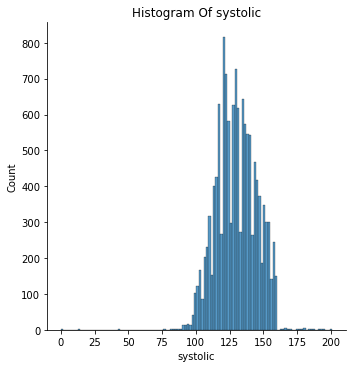

In [120]:
sns.displot(data.systolic)
plt.title('Histogram Of systolic')

Text(0.5, 1.0, 'Normality Of systolic')

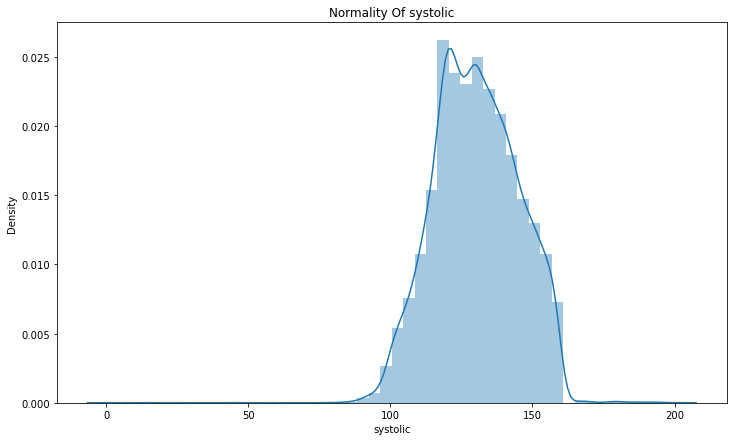

In [121]:
sns.distplot(data.systolic)
plt.title('Normality Of systolic')

Text(0.5, 1.0, 'systolic - Count')

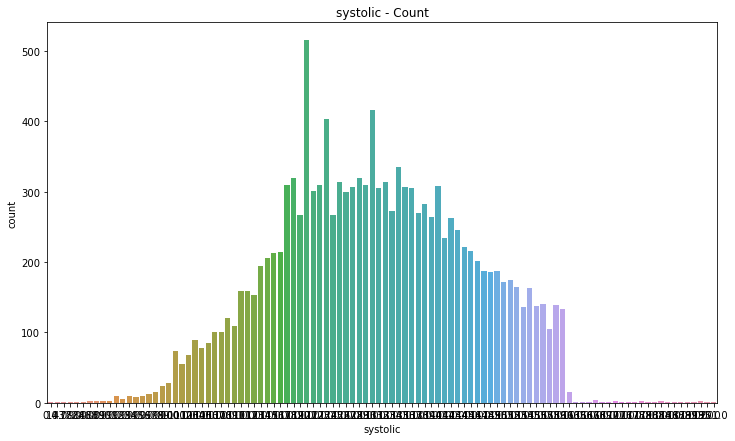

In [122]:
sns.countplot(data.systolic)
plt.title('systolic - Count')

Text(0.5, 1.0, 'Box Plot of systolic')

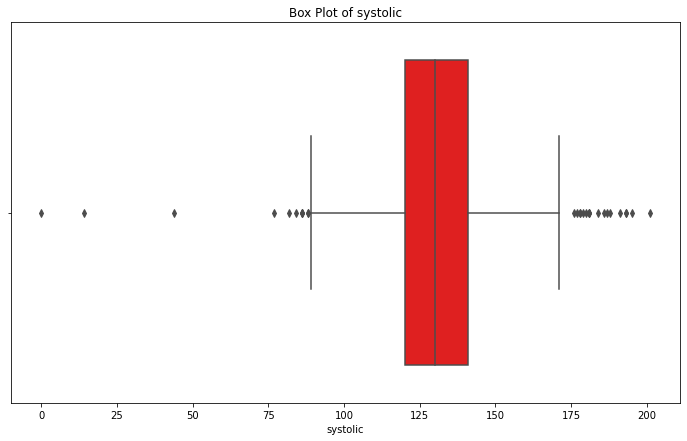

In [123]:
sns.boxplot(data.systolic, color = 'r')
plt.title('Box Plot of systolic')

In [124]:
Q3_s = data.systolic.quantile(0.75)
Q3_s

141.0

In [125]:
Q1_s = data.systolic.quantile(0.25)
Q1_s

120.0

In [126]:
IQR_s = Q3_s - Q1_s
IQR_s

21.0

In [127]:
UL_s = Q3_s + (1.5 * IQR_s)
UL_s

172.5

In [128]:
LL_s = Q1_s - (1.5 * IQR_s)
LL_s

88.5

In [129]:
data.systolic[(data.systolic > UL_s)].value_counts().sum()

18

In [130]:
data.systolic[(data.systolic < LL_s)].value_counts().sum()

11

In [131]:
data['systolic'] = np.where(data['systolic'] > UL_s, UL_s, data['systolic'])

In [132]:
data['systolic'] = np.where(data['systolic'] < LL_s, LL_s, data['systolic'])

Text(0.5, 1.0, 'Box Plot of systolic')

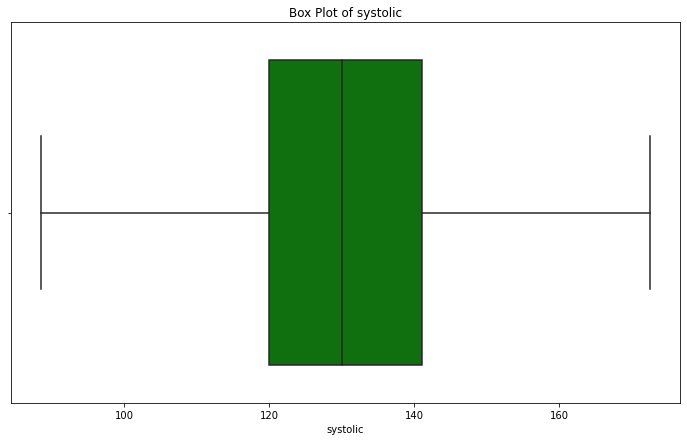

In [133]:
sns.boxplot(data.systolic, color = 'g')
plt.title('Box Plot of systolic')

Text(0.5, 1.0, 'Normality Of systolic')

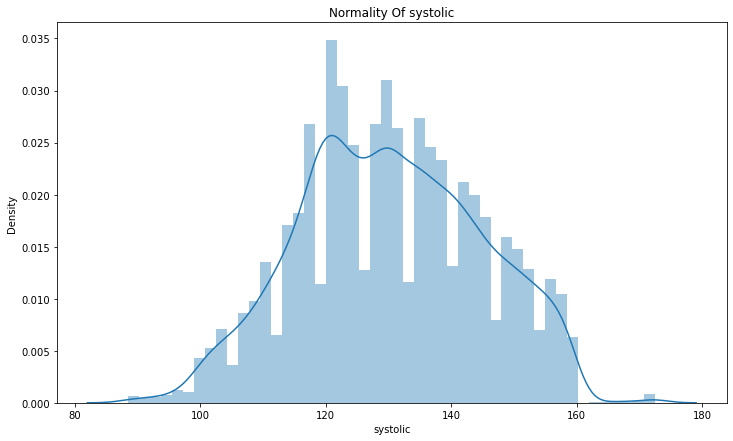

In [134]:
sns.distplot(data.systolic)
plt.title('Normality Of systolic')

In [135]:
data.systolic.groupby(data.class_t).describe()

,count,mean,std,min,25%,50%,75%,max
class_t,,,,,,,,
1,3348.0,129.283751,14.524995,88.5,119.0,128.0,140.0,172.5
2,3347.0,130.642217,14.356066,88.5,120.0,130.0,141.0,172.5
3,3349.0,129.910122,14.466260,91.0,120.0,130.0,140.0,172.5
4,3349.0,131.107495,14.850875,88.5,120.0,131.0,143.0,172.5


In [136]:
mod_s = ols('class_t ~ systolic', data = data).fit()
sm.stats.anova_lm(mod_s)

,df,sum_sq,mean_sq,F,PR(>F)
systolic,1.0,22.158750,22.158750,17.746783,0.000025
Residual,13391.0,16720.090784,1.248607,NaN,NaN


In [137]:
tukey_s = pairwise_tukeyhsd(data.systolic, data.class_t, alpha = 0.05)
print(tukey_s)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   1.3585  0.001  0.4446 2.2723   True
     1      3   0.6264 0.2924 -0.2873 1.5401  False
     1      4   1.8237  0.001  0.9101 2.7374   True
     2      3  -0.7321 0.1671 -1.6458 0.1817  False
     2      4   0.4653 0.5508 -0.4485  1.379  False
     3      4   1.1974 0.0042  0.2838  2.111   True
---------------------------------------------------


Text(0.5, 1.0, 'Cat Plot Of systolic vs class_t')

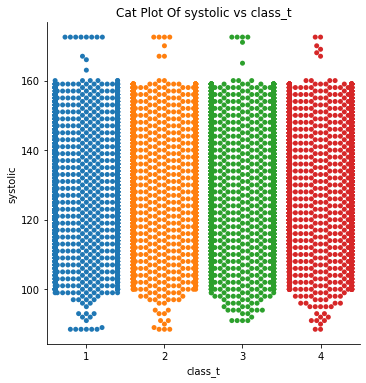

In [138]:
sns.catplot(x = 'class_t', y ='systolic', kind = 'swarm', data = data)
plt.title('Cat Plot Of systolic vs class_t')

Text(0.5, 1.0, 'Box Plot Of systolic vs class_t')

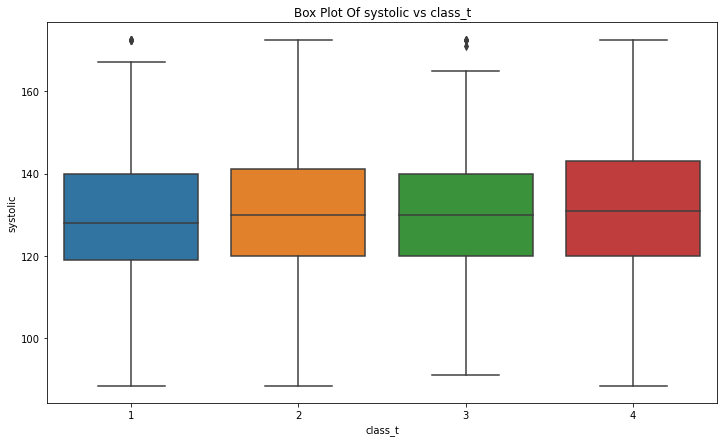

In [139]:
sns.boxplot(x = 'class_t', y ='systolic', data = data)
plt.title('Box Plot Of systolic vs class_t')

**GOOD PREDICTOR**

# 

# 

# 7) gripForce

In [140]:
data.gripForce.describe()

count    13393.000000
mean        36.963877
std         10.624864
min          0.000000
25%         27.500000
50%         37.900000
75%         45.200000
max         70.500000
Name: gripForce, dtype: float64

In [141]:
data.gripForce.value_counts()

43.10    71
43.90    67
40.60    59
40.30    58
39.30    58
         ..
10.10     1
14.20     1
27.36     1
13.60     1
63.50     1
Name: gripForce, Length: 550, dtype: int64

Text(0.5, 1.0, 'Histogram Of gripForce')

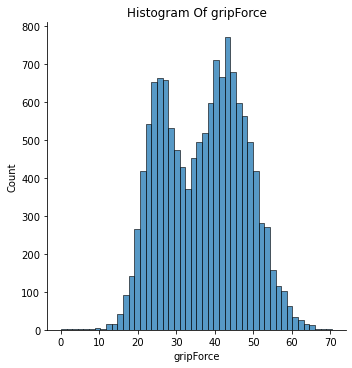

In [142]:
sns.displot(data.gripForce)
plt.title('Histogram Of gripForce')

Text(0.5, 1.0, 'Normality Of gripForce')

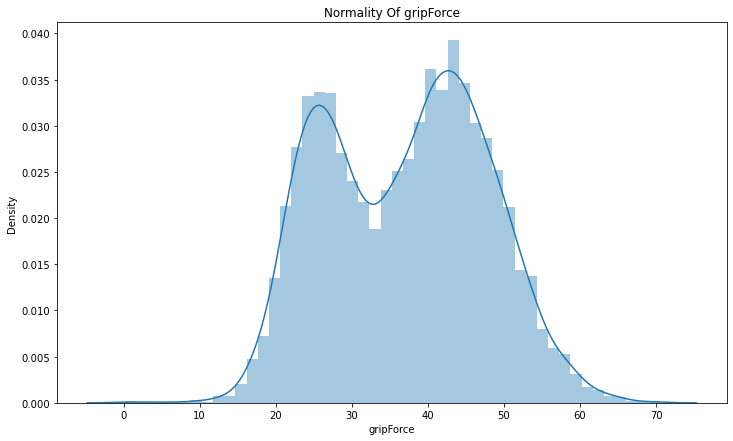

In [143]:
sns.distplot(data.gripForce)
plt.title('Normality Of gripForce')

Text(0.5, 1.0, 'gripForce - Count')

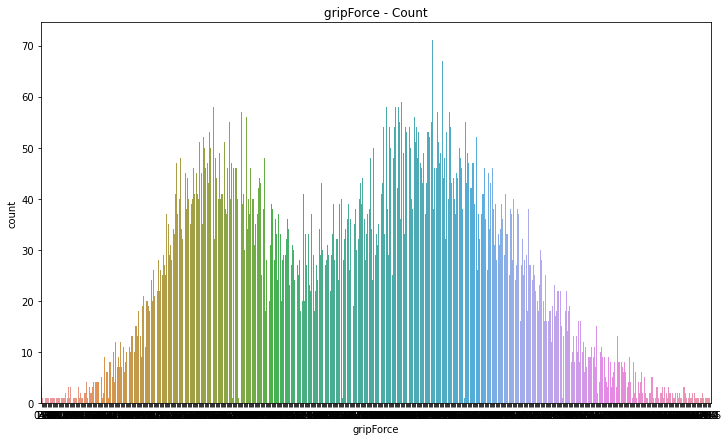

In [144]:
sns.countplot(data.gripForce)
plt.title('gripForce - Count')

Text(0.5, 1.0, 'Box Plot of gripForce')

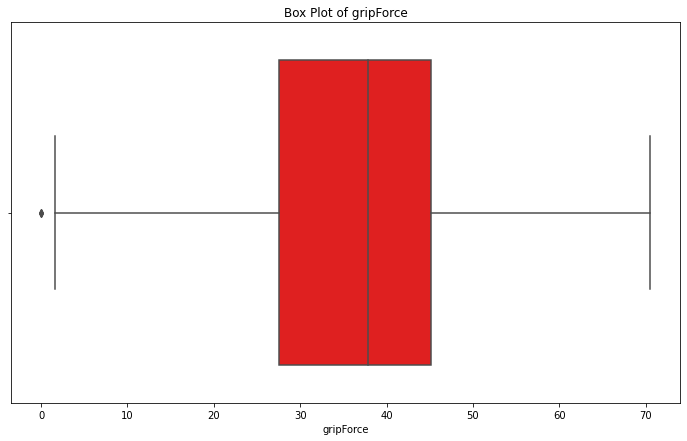

In [145]:
sns.boxplot(data.gripForce, color = 'r')
plt.title('Box Plot of gripForce')

In [146]:
Q3_g = data.gripForce.quantile(0.75)
Q3_g

45.2

In [147]:
Q1_g = data.gripForce.quantile(0.25)
Q1_g

27.5

In [148]:
IQR_g = Q3_g - Q1_g
IQR_g

17.700000000000003

In [149]:
UL_g = Q3_g + (1.5 * IQR_g)
UL_g

71.75

In [150]:
LL_g = Q1_g - (1.5 * IQR_g)
LL_g

0.9499999999999957

In [151]:
data.gripForce[(data.gripForce > UL_g)].value_counts().sum()

0

In [152]:
data.gripForce[(data.gripForce < LL_g)].value_counts().sum()

3

In [153]:
data['gripForce'] = np.where(data['gripForce'] < LL_g, LL_g, data['gripForce'])

Text(0.5, 1.0, 'Box Plot of gripForce')

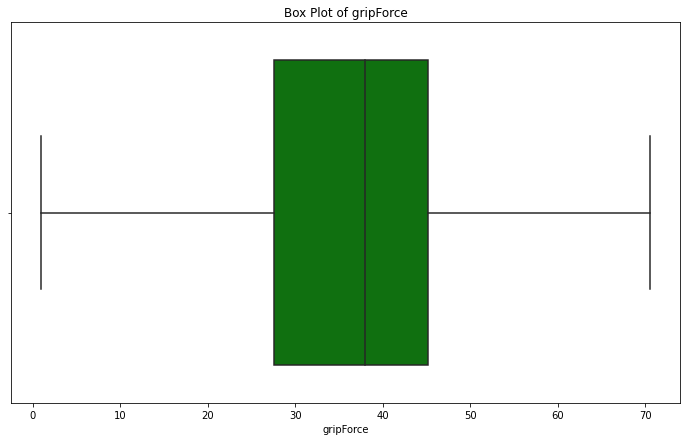

In [154]:
sns.boxplot(data.gripForce, color = 'g')
plt.title('Box Plot of gripForce')

Text(0.5, 1.0, 'Normality Of gripForce')

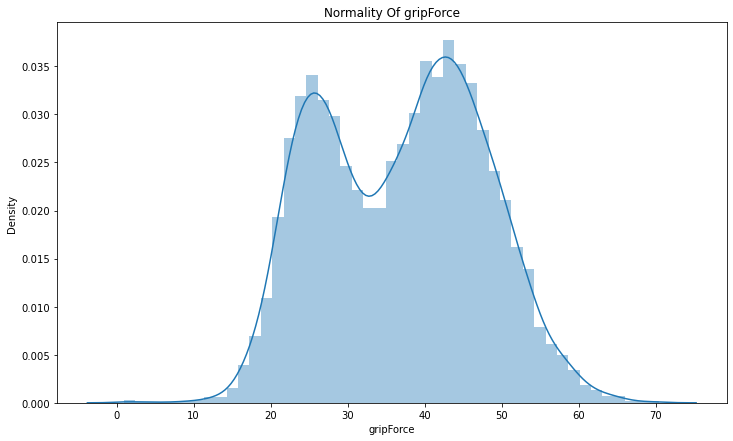

In [155]:
sns.distplot(data.gripForce)
plt.title('Normality Of gripForce')

In [156]:
data.gripForce.groupby(data.class_t).describe()

,count,mean,std,min,25%,50%,75%,max
class_t,,,,,,,,
1,3348.0,38.615723,10.890453,2.10,28.6,39.05,47.6,70.5
2,3347.0,37.910720,10.392392,0.95,28.1,39.60,45.7,69.9
3,3349.0,36.582947,10.216414,0.95,27.1,38.00,44.1,65.2
4,3349.0,34.748029,10.579623,0.95,25.5,35.60,42.8,70.4


In [157]:
mod_g = ols('class_t ~ gripForce', data = data).fit()
sm.stats.anova_lm(mod_g)

,df,sum_sq,mean_sq,F,PR(>F)
gripForce,1.0,310.066520,310.066520,252.681021,2.214469e-56
Residual,13391.0,16432.183013,1.227106,NaN,NaN


In [158]:
tukey_g = pairwise_tukeyhsd(data.gripForce, data.class_t, alpha = 0.05)
print(tukey_g)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   -0.705 0.0312 -1.3659 -0.0442   True
     1      3  -2.0328  0.001 -2.6935  -1.372   True
     1      4  -3.8677  0.001 -4.5284 -3.2069   True
     2      3  -1.3278  0.001 -1.9886  -0.667   True
     2      4  -3.1627  0.001 -3.8235 -2.5019   True
     3      4  -1.8349  0.001 -2.4956 -1.1742   True
----------------------------------------------------


Text(0.5, 1.0, 'Cat Plot Of gripForce vs class_t')

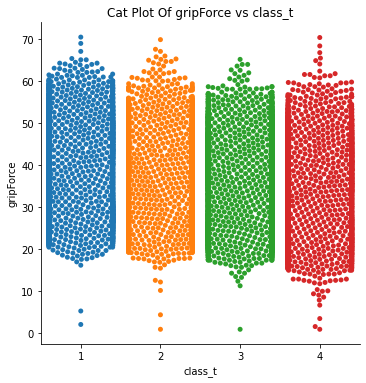

In [159]:
sns.catplot(x = 'class_t', y ='gripForce', kind = 'swarm', data = data)
plt.title('Cat Plot Of gripForce vs class_t')

Text(0.5, 1.0, 'Box Plot Of gripForce vs class_t')

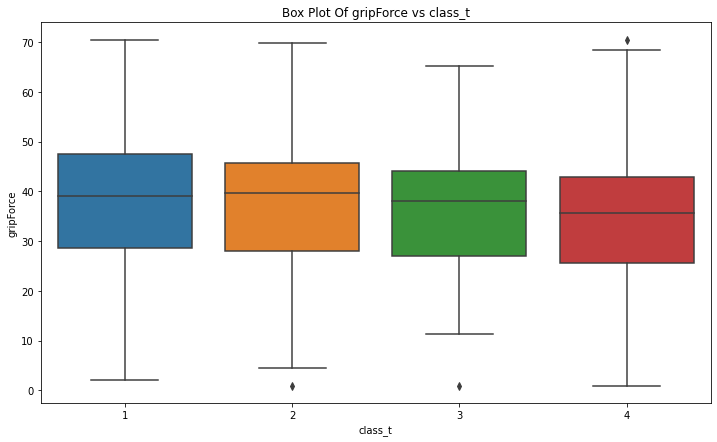

In [160]:
sns.boxplot(x = 'class_t', y ='gripForce', data = data)
plt.title('Box Plot Of gripForce vs class_t')

**GOOD PREDICTOR**

# 

# 

# 8) sit_and_bend_forward_cm

In [161]:
data.sit_and_bend_forward_cm.describe()

count    13393.000000
mean        15.209268
std          8.456677
min        -25.000000
25%         10.900000
50%         16.200000
75%         20.700000
max        213.000000
Name: sit_and_bend_forward_cm, dtype: float64

In [162]:
data.sit_and_bend_forward_cm.value_counts()

 20.00    119
 18.50    102
 16.00    102
 19.00    100
 17.00     99
         ... 
-17.30      1
-7.10       1
 33.00      1
 18.38      1
 10.03      1
Name: sit_and_bend_forward_cm, Length: 528, dtype: int64

Text(0.5, 1.0, 'Normality Of sit_and_bend_forward_cm')

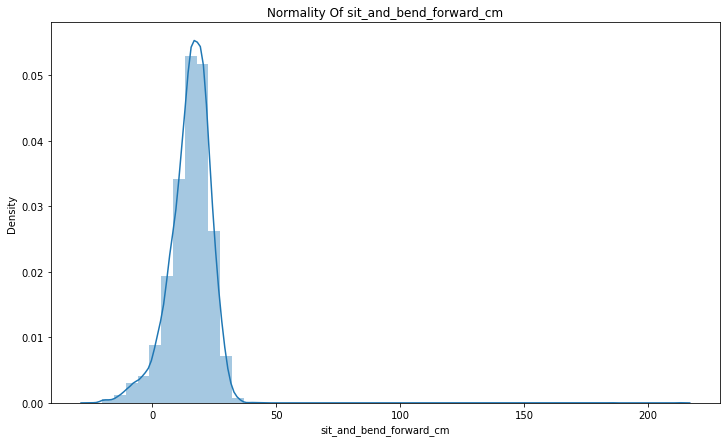

In [163]:
sns.distplot(data.sit_and_bend_forward_cm)
plt.title('Normality Of sit_and_bend_forward_cm')

Text(0.5, 1.0, 'sit_and_bend_forward_cm - Count')

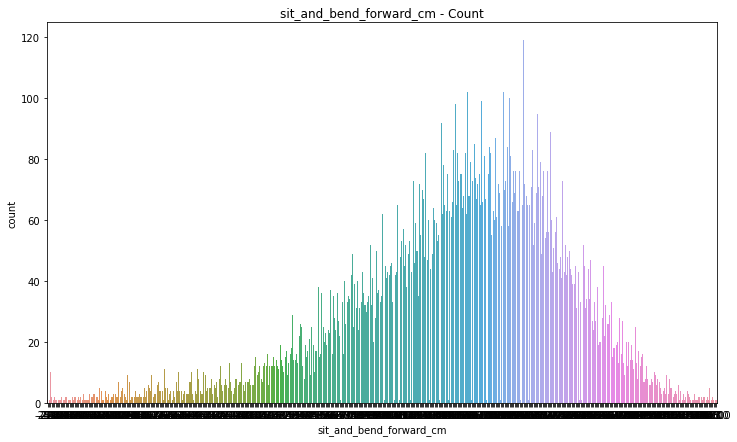

In [164]:
sns.countplot(data.sit_and_bend_forward_cm)
plt.title('sit_and_bend_forward_cm - Count')

Text(0.5, 1.0, 'Box Plot of sit_and_bend_forward_cm')

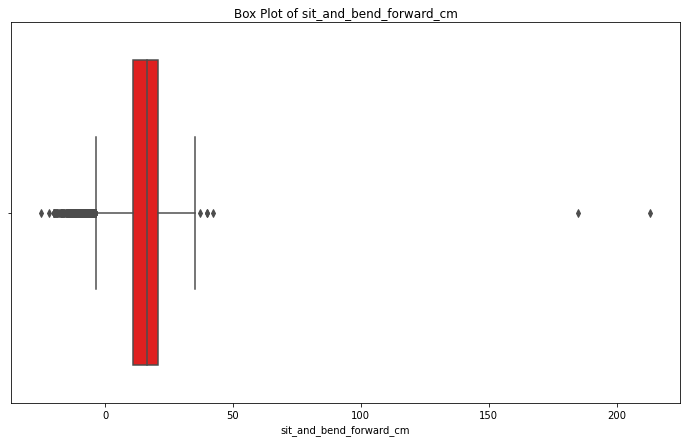

In [165]:
sns.boxplot(data.sit_and_bend_forward_cm, color = 'r')
plt.title('Box Plot of sit_and_bend_forward_cm')

In [166]:
Q3_sb = data.sit_and_bend_forward_cm.quantile(0.75)
Q3_sb

20.7

In [167]:
Q1_sb = data.sit_and_bend_forward_cm.quantile(0.25)
Q1_sb

10.9

In [168]:
IQR_sb = Q3_sb - Q1_sb
IQR_sb

9.799999999999999

In [169]:
UL_sb = Q3_sb + (1.5 * IQR_sb)
UL_sb

35.4

In [170]:
LL_sb = Q1_sb - (1.5 * IQR_sb)
LL_sb

-3.799999999999999

In [171]:
data.sit_and_bend_forward_cm[(data.sit_and_bend_forward_cm > UL_sb)].value_counts().sum()

6

In [172]:
data.sit_and_bend_forward_cm[(data.sit_and_bend_forward_cm < LL_sb)].value_counts().sum()

403

In [173]:
data['sit_and_bend_forward_cm'] = np.where(data['sit_and_bend_forward_cm'] > UL_sb, UL_sb, data['sit_and_bend_forward_cm'])

In [174]:
data['sit_and_bend_forward_cm'] = np.where(data['sit_and_bend_forward_cm'] < LL_sb, LL_sb, data['sit_and_bend_forward_cm'])

Text(0.5, 1.0, 'Box Plot of sit_and_bend_forward_cm')

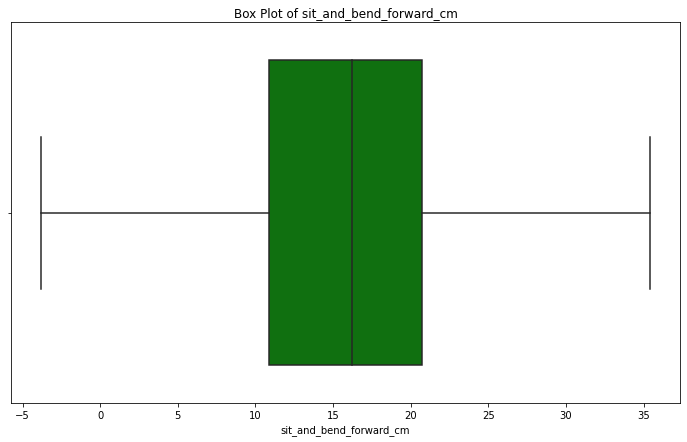

In [175]:
sns.boxplot(data.sit_and_bend_forward_cm, color = 'g')
plt.title('Box Plot of sit_and_bend_forward_cm')

Text(0.5, 1.0, 'Normality Of sit_and_bend_forward_cm')

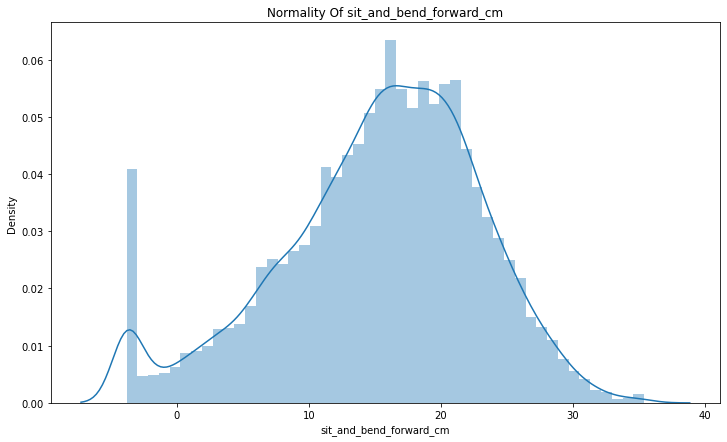

In [176]:
sns.distplot(data.sit_and_bend_forward_cm)
plt.title('Normality Of sit_and_bend_forward_cm')

In [177]:
data.sit_and_bend_forward_cm.groupby(data.class_t).describe()

,count,mean,std,min,25%,50%,75%,max
class_t,,,,,,,,
1,3348.0,21.345122,4.271493,11.8,18.2,21.1,24.1,35.4
2,3347.0,17.411775,4.842356,7.1,13.8,17.0,20.5,35.4
3,3349.0,14.390167,5.882182,2.3,9.8,14.0,18.5,35.4
4,3349.0,8.217145,8.257697,-3.8,1.7,7.7,14.5,35.2


In [178]:
mod_sb = ols('class_t ~ sit_and_bend_forward_cm', data = data).fit()
sm.stats.anova_lm(mod_sb)

,df,sum_sq,mean_sq,F,PR(>F)
sit_and_bend_forward_cm,1.0,6366.776834,6366.776834,8217.2168,0.0
Residual,13391.0,10375.472700,0.774809,NaN,NaN


In [179]:
tukey_sb = pairwise_tukeyhsd(data.sit_and_bend_forward_cm, data.class_t, alpha = 0.05)
print(tukey_sb)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     1      2  -3.9333 0.001  -4.3108  -3.5559   True
     1      3   -6.955 0.001  -7.3324  -6.5775   True
     1      4  -13.128 0.001 -13.5054 -12.7506   True
     2      3  -3.0216 0.001   -3.399  -2.6442   True
     2      4  -9.1946 0.001  -9.5721  -8.8172   True
     3      4   -6.173 0.001  -6.5504  -5.7956   True
-----------------------------------------------------


Text(0.5, 1.0, 'Cat Plot Of sit_and_bend_forward_cm vs class_t')

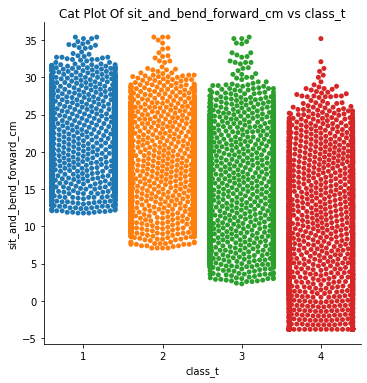

In [180]:
sns.catplot(x = 'class_t', y ='sit_and_bend_forward_cm', kind = 'swarm', data = data)
plt.title('Cat Plot Of sit_and_bend_forward_cm vs class_t')

Text(0.5, 1.0, 'Box Plot Of sit_and_bend_forward_cm vs class_t')

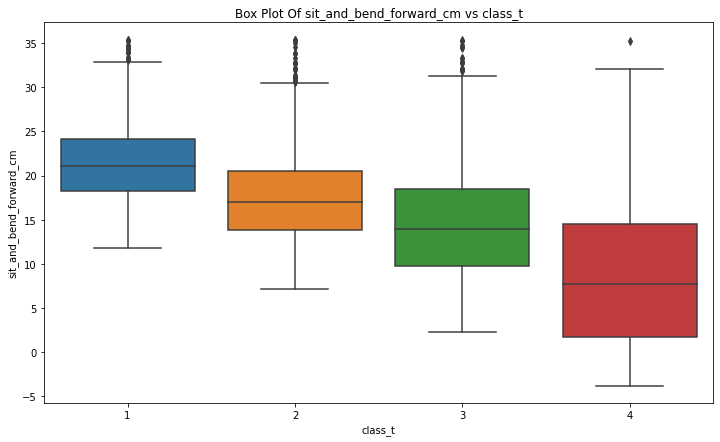

In [181]:
sns.boxplot(x = 'class_t', y ='sit_and_bend_forward_cm', data = data)
plt.title('Box Plot Of sit_and_bend_forward_cm vs class_t')

**GOOD PREDICTOR**


# 

# 

# 9) sit_ups_counts

In [182]:
data.sit_ups_counts.describe()

count    13393.000000
mean        39.771224
std         14.276698
min          0.000000
25%         30.000000
50%         41.000000
75%         50.000000
max         80.000000
Name: sit_ups_counts, dtype: float64

In [183]:
data.sit_ups_counts.value_counts()

45.0    416
40.0    394
50.0    393
46.0    383
47.0    369
       ... 
78.0      2
73.0      2
19.4      1
4.6       1
80.0      1
Name: sit_ups_counts, Length: 81, dtype: int64

Text(0.5, 1.0, 'Histogram Of sit_ups_counts')

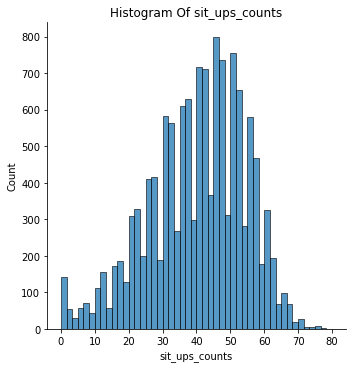

In [184]:
sns.displot(data.sit_ups_counts)
plt.title('Histogram Of sit_ups_counts')

Text(0.5, 1.0, 'Normality Of sit_ups_counts')

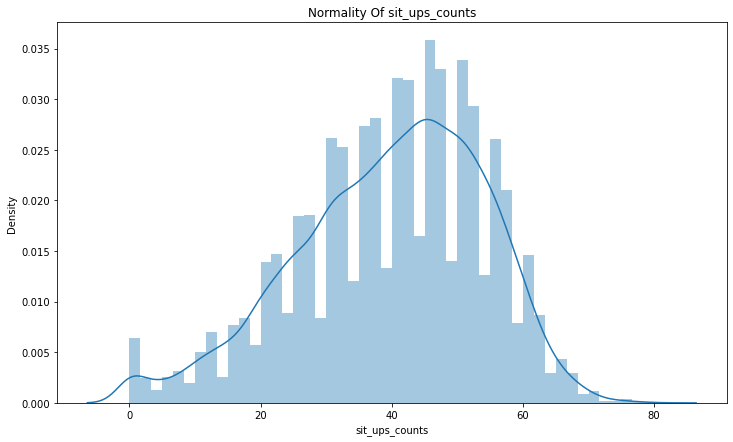

In [185]:
sns.distplot(data.sit_ups_counts)
plt.title('Normality Of sit_ups_counts')

Text(0.5, 1.0, 'sit_ups_counts - Count')

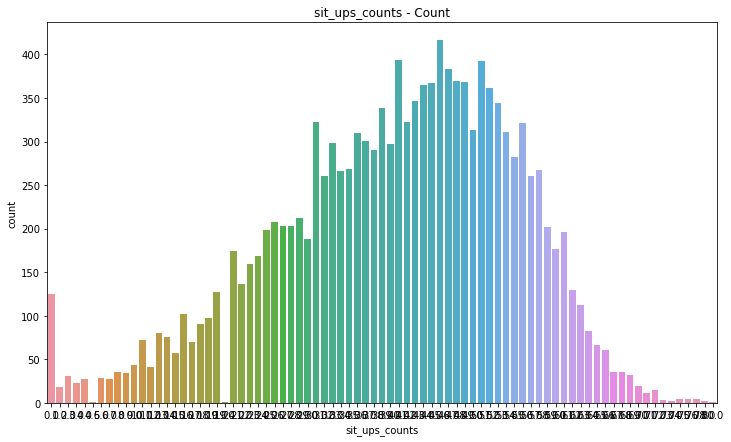

In [186]:
sns.countplot(data.sit_ups_counts)
plt.title('sit_ups_counts - Count')

Text(0.5, 1.0, 'Box Plot of sit_ups_counts')

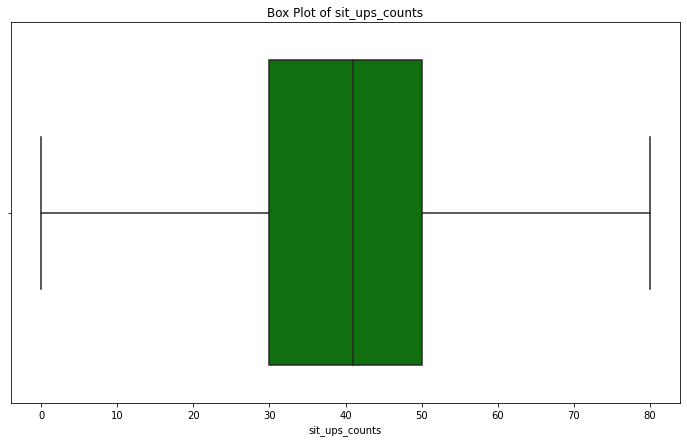

In [187]:
sns.boxplot(data.sit_ups_counts, color = 'g')
plt.title('Box Plot of sit_ups_counts')

In [188]:
data.sit_ups_counts.groupby(data.class_t).describe()

,count,mean,std,min,25%,50%,75%,max
class_t,,,,,,,,
1,3348.0,47.848268,10.816957,17.0,40.0,49.0,56.0,80.0
2,3347.0,42.639199,11.740307,12.0,34.0,44.0,51.0,78.0
3,3349.0,38.720215,12.734618,7.0,30.0,40.0,48.0,71.0
4,3349.0,29.881338,15.033177,0.0,20.0,30.0,41.0,78.0


In [189]:
mod_su = ols('class_t ~ sit_ups_counts', data = data).fit()
sm.stats.anova_lm(mod_su)

,df,sum_sq,mean_sq,F,PR(>F)
sit_ups_counts,1.0,3433.109425,3433.109425,3454.225287,0.0
Residual,13391.0,13309.140109,0.993887,NaN,NaN


In [190]:
tukey_su = pairwise_tukeyhsd(data.sit_ups_counts, data.class_t, alpha = 0.05)
print(tukey_su)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     1      2  -5.2091 0.001  -6.0053  -4.4128   True
     1      3  -9.1281 0.001  -9.9242  -8.3319   True
     1      4 -17.9669 0.001 -18.7631 -17.1708   True
     2      3   -3.919 0.001  -4.7152  -3.1228   True
     2      4 -12.7579 0.001 -13.5541 -11.9616   True
     3      4  -8.8389 0.001   -9.635  -8.0428   True
-----------------------------------------------------


Text(0.5, 1.0, 'Cat Plot Of sit_ups_counts vs class_t')

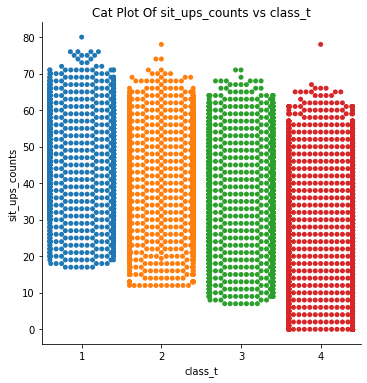

In [191]:
sns.catplot(x = 'class_t', y ='sit_ups_counts', kind = 'swarm', data = data)
plt.title('Cat Plot Of sit_ups_counts vs class_t')

Text(0.5, 1.0, 'Box Plot Of sit_ups_counts vs class_t')

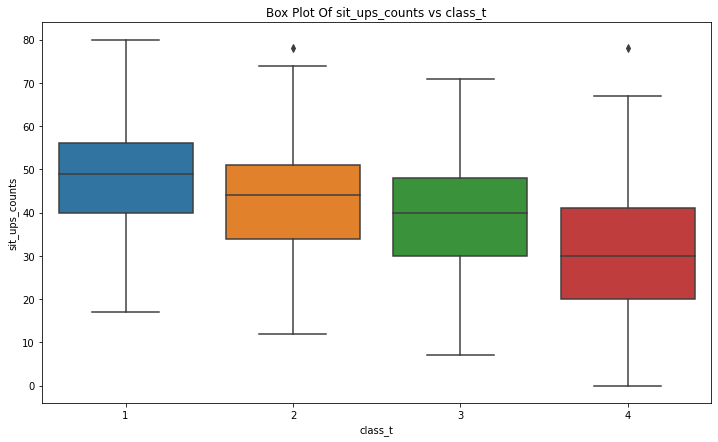

In [192]:
sns.boxplot(x = 'class_t', y ='sit_ups_counts', data = data)
plt.title('Box Plot Of sit_ups_counts vs class_t')

**GOOD PREDICTOR**

# 

# 

# 10) broad_jump_cm

In [193]:
data.broad_jump_cm.describe()

count    13393.000000
mean       190.129627
std         39.868000
min          0.000000
25%        162.000000
50%        193.000000
75%        221.000000
max        303.000000
Name: broad_jump_cm, dtype: float64

In [194]:
data.broad_jump_cm.value_counts()

211.0    181
220.0    176
230.0    172
180.0    161
200.0    157
        ... 
299.0      1
59.0       1
57.0       1
43.0       1
58.0       1
Name: broad_jump_cm, Length: 245, dtype: int64

Text(0.5, 1.0, 'Histogram Of broad_jump_cm')

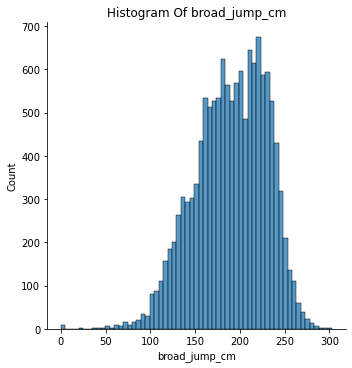

In [195]:
sns.displot(data.broad_jump_cm)
plt.title('Histogram Of broad_jump_cm')

Text(0.5, 1.0, 'Normality Of broad_jump_cm')

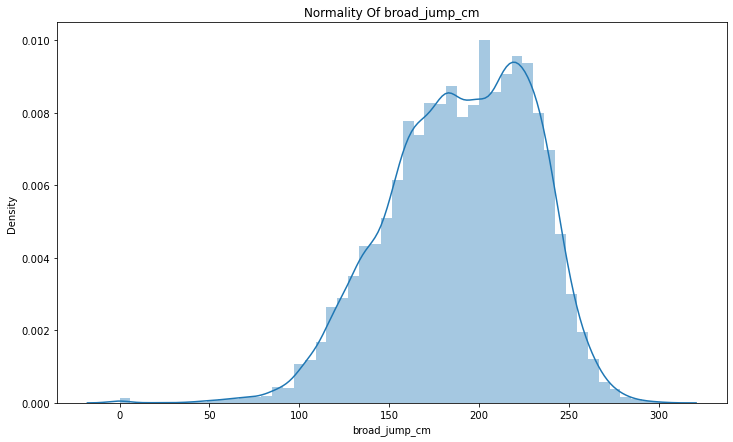

In [196]:
sns.distplot(data.broad_jump_cm)
plt.title('Normality Of broad_jump_cm')

Text(0.5, 1.0, 'broad_jump_cm - Count')

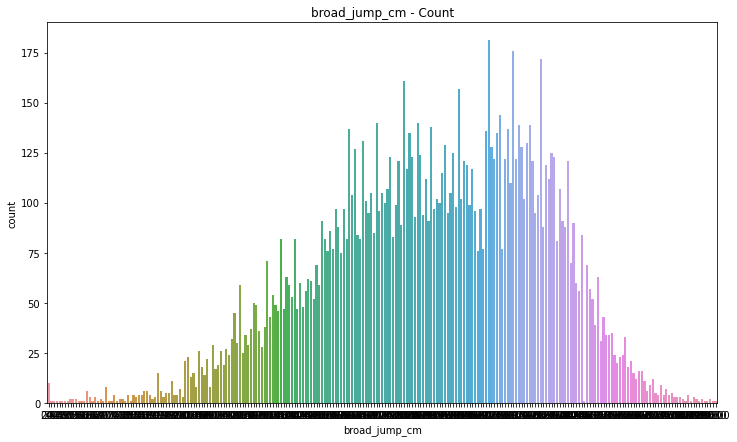

In [197]:
sns.countplot(data.broad_jump_cm)
plt.title('broad_jump_cm - Count')

Text(0.5, 1.0, 'Box Plot of broad_jump_cm')

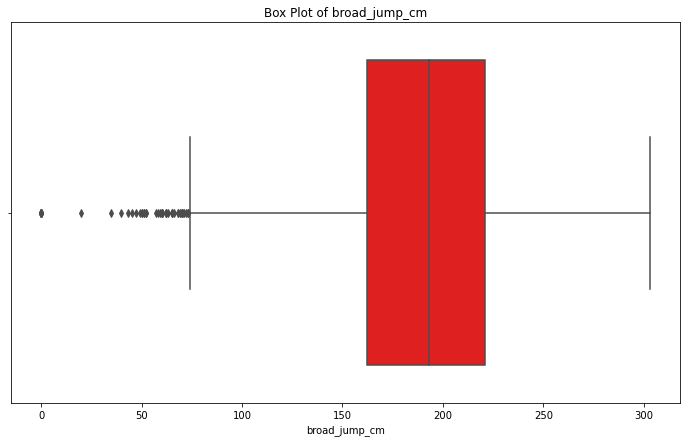

In [198]:
sns.boxplot(data.broad_jump_cm, color = 'r')
plt.title('Box Plot of broad_jump_cm')

In [199]:
Q3_bj = data.broad_jump_cm.quantile(0.75)
Q3_bj

221.0

In [200]:
Q1_bj = data.broad_jump_cm.quantile(0.25)
Q1_bj

162.0

In [201]:
IQR_bj = Q3_bj - Q1_bj
IQR_bj

59.0

In [202]:
UL_bj = Q3_bj + (1.5 * IQR_bj)
UL_bj

309.5

In [203]:
LL_bj = Q1_bj - (1.5 * IQR_bj)
LL_bj

73.5

In [204]:
data.broad_jump_cm[(data.broad_jump_cm > UL_bj)].value_counts().sum()

0

In [205]:
data.broad_jump_cm[(data.broad_jump_cm < LL_bj)].value_counts().sum()

57

In [206]:
data['broad_jump_cm'] = np.where(data['broad_jump_cm'] < LL_bj, LL_bj, data['broad_jump_cm'])

Text(0.5, 1.0, 'Box Plot broad_jump_cm')

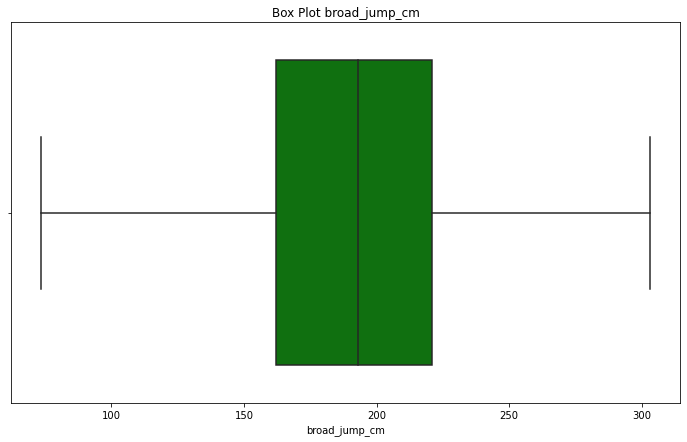

In [207]:
sns.boxplot(data.broad_jump_cm, color = 'g')
plt.title('Box Plot broad_jump_cm')

Text(0.5, 1.0, 'Normality Of broad_jump_cm')

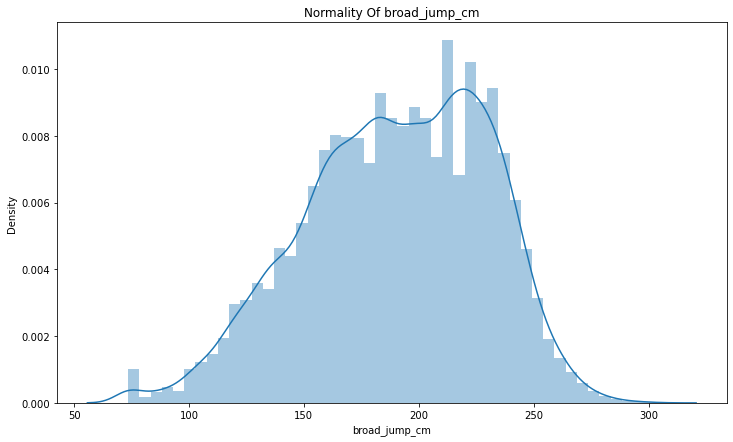

In [208]:
sns.distplot(data.broad_jump_cm)
plt.title('Normality Of broad_jump_cm')

In [209]:
data.broad_jump_cm.groupby(data.class_t).describe()

,count,mean,std,min,25%,50%,75%,max
class_t,,,,,,,,
1,3348.0,202.754032,35.844824,73.5,174.0,202.0,234.0,299.0
2,3347.0,195.333313,36.312350,73.5,167.0,200.0,224.0,295.0
3,3349.0,188.730517,38.970122,73.5,160.0,194.0,220.0,303.0
4,3349.0,174.113765,40.947506,73.5,143.0,180.0,205.0,275.0


In [210]:
mod_A = ols('class_t ~ broad_jump_cm', data = data).fit()
sm.stats.anova_lm(mod_A)

,df,sum_sq,mean_sq,F,PR(>F)
broad_jump_cm,1.0,1148.131576,1148.131576,985.924948,6.978556e-209
Residual,13391.0,15594.117958,1.164522,NaN,NaN


In [211]:
tukey_A = pairwise_tukeyhsd(data.broad_jump_cm, data.class_t, alpha = 0.05)
print(tukey_A)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     1      2  -7.4207 0.001  -9.8119  -5.0295   True
     1      3 -14.0235 0.001 -16.4144 -11.6326   True
     1      4 -28.6403 0.001 -31.0311 -26.2494   True
     2      3  -6.6028 0.001  -8.9938  -4.2117   True
     2      4 -21.2195 0.001 -23.6106 -18.8285   True
     3      4 -14.6168 0.001 -17.0074 -12.2261   True
-----------------------------------------------------


Text(0.5, 1.0, 'Cat Plot Of broad_jump_cm vs class_t')

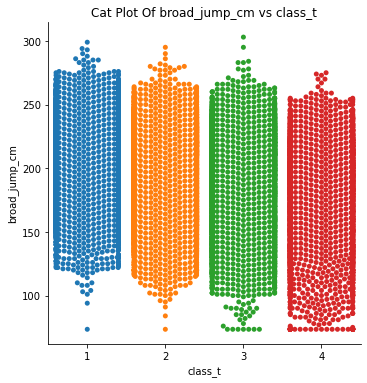

In [212]:
sns.catplot(x = 'class_t', y ='broad_jump_cm', kind = 'swarm', data = data)
plt.title('Cat Plot Of broad_jump_cm vs class_t')

Text(0.5, 1.0, 'Box Plot Of broad_jump_cm vs class_t')

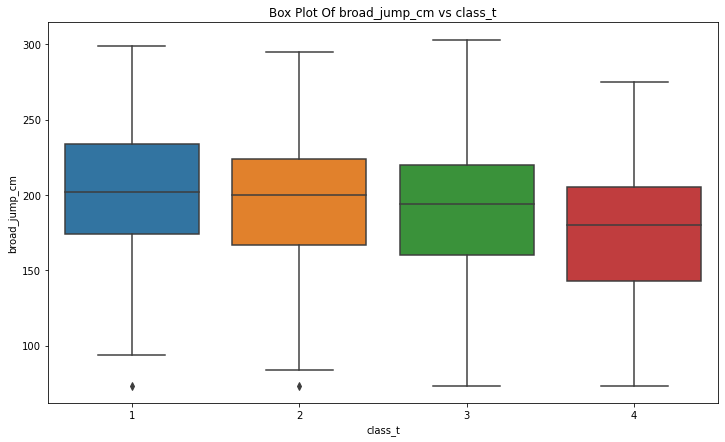

In [213]:
sns.boxplot(x = 'class_t', y ='broad_jump_cm', data = data)
plt.title('Box Plot Of broad_jump_cm vs class_t')

**GOOD PREDICTOR**

# 

# 

# 

# All Are Good Predictor

# 

# 

# 

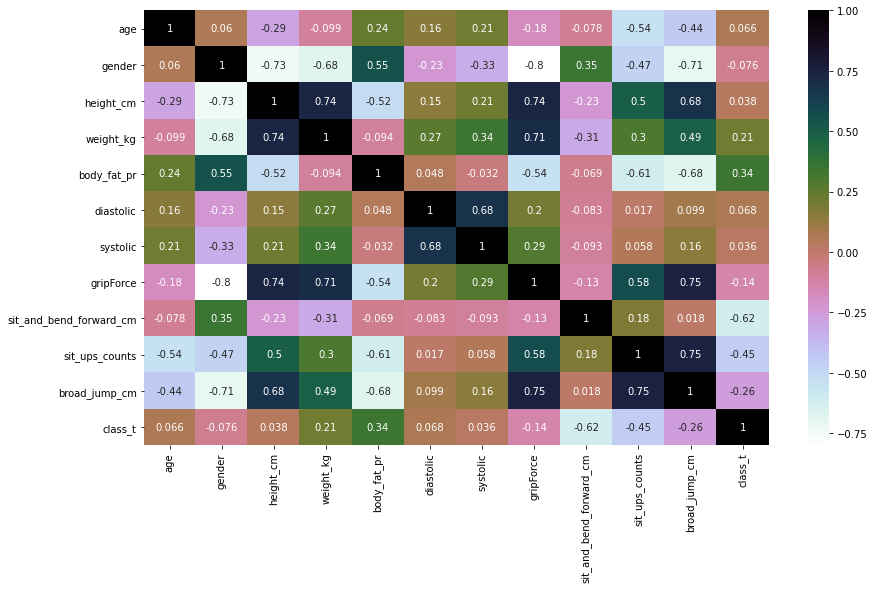

In [214]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot = True, cmap = 'cubehelix_r')
plt.show()

# 

# 

# 

# Logistic Regression Model

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  int64  
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body_fat_pr              13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit_and_bend_forward_cm  13393 non-null  float64
 9   sit_ups_counts           13393 non-null  float64
 10  broad_jump_cm            13393 non-null  float64
 11  class_t                  13393 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.2 MB


In [216]:
X = data.iloc[:, :11]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  int64  
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body_fat_pr              13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit_and_bend_forward_cm  13393 non-null  float64
 9   sit_ups_counts           13393 non-null  float64
 10  broad_jump_cm            13393 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.1 MB


In [217]:
y = data[['class_t']]
y

,class_t
0,3
1,1
2,3
3,2
4,2
...,...
13388,3
13389,4
13390,1
13391,4


In [218]:
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

In [221]:
lr_body = LogisticRegression()
lr_body = lr_body.fit(X_train, y_train)

In [222]:
y_body_pred = lr_body.predict(X_test)

In [223]:
print(metrics.accuracy_score(y_test, y_body_pred))

0.5957446808510638


 # ________multi_class = ovr


In [224]:
lr_body = LogisticRegression(multi_class='ovr')
lr_body = lr_body.fit(X_train, y_train)

In [225]:
y_pred_body2 = lr_body.predict(X_test)

In [226]:
print(metrics.accuracy_score(y_test, y_pred_body2))

0.5815602836879432


# ________multiclass= multinomial, solver = newton_cg

In [227]:
lr_body = LogisticRegression(multi_class='multinomial',solver='newton-cg')
lr_body = lr_body.fit(X_train, y_train)

In [228]:
y_pred_body3 = lr_body.predict(X_test)

In [229]:
print(metrics.accuracy_score(y_test, y_pred_body3))

0.6132885405001867


# ________multiclass= multinomial, solver = lbfgs

In [230]:
lr_body = LogisticRegression(multi_class='multinomial',solver='lbfgs')
lr_body = lr_body.fit(X_train, y_train)

In [231]:
y_pred_body4 = lr_body.predict(X_test)

In [232]:
print(metrics.accuracy_score(y_test, y_pred_body4))

0.5957446808510638


# ________multiclass= multinomial, solver = sag

In [233]:
lr_body = LogisticRegression(multi_class='multinomial',solver='sag')
lr_body = lr_body.fit(X_train, y_train)

In [234]:
y_pred_body5 = lr_body.predict(X_test)

In [235]:
print(metrics.accuracy_score(y_test, y_pred_body5))

0.5998506905561777


# ________multiclass= multinomial, solver = saga


In [236]:
lr_body = LogisticRegression(multi_class='multinomial',solver='saga')
lr_body = lr_body.fit(X_train, y_train)

In [237]:
y_pred_body6 = lr_body.predict(X_test)

In [238]:
print(metrics.accuracy_score(y_test, y_pred_body6))

0.6017170586039567


# 

# _________gridsearch

In [239]:
from sklearn.model_selection import GridSearchCV
import time

In [240]:
penalty = ['l1','l2']
max_iter=[80, 100,140]
C = np.linspace(0.1, 1.0, num = 5)

In [242]:
X_train.head()

,age,gender,height_cm,weight_kg,body_fat_pr,diastolic,systolic,gripForce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm
12168,26.0,1,156.3,45.90,31.6,80.0,114.0,17.9,10.4,26.0,105.0
13014,24.0,0,163.1,69.76,26.0,80.0,120.0,41.1,5.3,40.0,192.0
3566,46.0,1,158.4,56.70,27.4,72.0,121.0,25.6,25.0,39.0,165.0
8655,34.0,0,165.3,65.00,19.1,75.0,142.0,45.3,18.5,68.0,228.0
11464,28.0,0,176.1,81.80,16.7,88.0,148.0,49.4,7.5,60.0,234.0


In [243]:
param_grid = dict(max_iter=max_iter, C=C, penalty=penalty)

In [244]:
lr_body = LogisticRegression(multi_class='multinomial',solver='newton-cg')

In [246]:
grid = GridSearchCV(estimator = lr_body, param_grid=param_grid, cv = 5)

In [247]:
start_time = time.time()

In [248]:
grid_result = grid.fit(X_train, y_train)

In [249]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.619098 using {'C': 0.1, 'max_iter': 80, 'penalty': 'l2'}
Execution time: 603.306360244751 ms


In [250]:
lr_body = LogisticRegression(multi_class='multinomial',solver='newton-cg', C=0.1, max_iter= 80, penalty= 'l2')
lr_body = lr_body.fit(X_train, y_train)
y_pred_body = lr_body.predict(X_test)

In [251]:
print(metrics.accuracy_score(y_test, y_pred_body))

0.6132885405001867


# 

# 

# 

# _________DecisionTree

In [252]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [253]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [254]:
 # training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

In [255]:
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
cm

array([[609,   0,  75,   0],
       [362,   0, 289,   0],
       [239,   0, 406,   8],
       [131,   0, 299, 261]], dtype=int64)

In [256]:
print(accuracy_score(y_test, dtree_predictions))

0.47629712579320643


In [257]:
print(classification_report(y_test, dtree_predictions))

              precision    recall  f1-score   support

           1       0.45      0.89      0.60       684
           2       0.00      0.00      0.00       651
           3       0.38      0.62      0.47       653
           4       0.97      0.38      0.54       691

    accuracy                           0.48      2679
   macro avg       0.45      0.47      0.40      2679
weighted avg       0.46      0.48      0.41      2679



# 

# 

# ____________svm

In [258]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

In [259]:
# model accuracy for X_test 
accuracy = svm_model_linear.score(X_test, y_test)

In [260]:
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[526, 153,   5,   0],
       [147, 321, 164,  19],
       [ 65, 147, 351,  90],
       [ 12,  39, 117, 523]], dtype=int64)

In [261]:
print(accuracy_score(y_test, svm_predictions))

0.6424038820455393


In [262]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           1       0.70      0.77      0.73       684
           2       0.49      0.49      0.49       651
           3       0.55      0.54      0.54       653
           4       0.83      0.76      0.79       691

    accuracy                           0.64      2679
   macro avg       0.64      0.64      0.64      2679
weighted avg       0.65      0.64      0.64      2679



# 

# 

# ____KNN

In [263]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

In [264]:
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.5770810003732736


In [265]:
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
cm

array([[532, 131,  17,   4],
       [225, 297, 110,  19],
       [ 99, 221, 290,  43],
       [ 24,  71, 169, 427]], dtype=int64)

In [266]:
print(accuracy_score(y_test, knn_predictions))

0.5770810003732736


In [267]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           1       0.60      0.78      0.68       684
           2       0.41      0.46      0.43       651
           3       0.49      0.44      0.47       653
           4       0.87      0.62      0.72       691

    accuracy                           0.58      2679
   macro avg       0.59      0.57      0.58      2679
weighted avg       0.60      0.58      0.58      2679



# 

# 

# ________Naive Bayes

In [268]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

In [269]:
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.5774542739828294


In [270]:
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
cm

array([[515, 126,  21,  22],
       [192, 245, 136,  78],
       [ 96, 146, 276, 135],
       [ 24,  46, 110, 511]], dtype=int64)

In [271]:
print(accuracy_score(y_test, gnb_predictions))

0.5774542739828294


In [272]:
print(classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

           1       0.62      0.75      0.68       684
           2       0.44      0.38      0.40       651
           3       0.51      0.42      0.46       653
           4       0.68      0.74      0.71       691

    accuracy                           0.58      2679
   macro avg       0.56      0.57      0.56      2679
weighted avg       0.57      0.58      0.57      2679

